<a href="https://colab.research.google.com/github/akl-1999/Walmart_Weekly_Sales_Forecasting_using_Time_Series_Machine_Learning/blob/main/Walmart_Weekly_Sales_Forecasting_using_Time_Series_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Walmart Weekly Sales Forecasting using Time Series Machine Learning**

# 1️⃣ Define the Problem Statement


## 1.1 Understand the Industry – Type of Problem

### Industry Context:
This project belongs to the **Retail Industry**, specifically large-scale chain retail operations.

Retail businesses rely heavily on accurate demand forecasting to:
- Manage inventory efficiently
- Avoid stockouts
- Reduce overstock losses
- Plan promotions and staffing

### Type of Machine Learning Problem:
- Supervised Learning
- Time Series Forecasting
- Regression Problem (Continuous Target Variable)

We are predicting:
Weekly_Sales (numerical value)

Since historical labeled data is available (sales per week), this is a supervised regression problem with temporal dependency.



## 1.2 Understand the Business Objective

### Why is this problem important?

Walmart wants to:
- Predict weekly sales for each store
- Prepare for high-demand holiday weeks
- Improve inventory allocation
- Reduce operational costs
- Improve revenue planning

### Desired Outcome:

A predictive model that:
- Accurately forecasts weekly sales
- Minimizes forecasting error
- Captures seasonality and holiday effects
- Helps decision-makers plan inventory and promotions



## 1.3 Constraints & Limitations

### Data Constraints:
- Historical data available only from Feb 2010 to Nov 2012
- Weekly frequency (limited granularity)
- Limited external macroeconomic variables

### Technical Constraints:
- Must avoid random train-test split (time-series dependency)
- Need time-aware cross-validation
- Handling lag features reduces available training rows

### Business Constraints:
- Model must be interpretable
- Predictions must be generated quickly
- Forecasting must be scalable across multiple stores



## 1.4 Evaluation Metrics

To evaluate forecasting performance, we use:

### 1️⃣ RMSE (Root Mean Square Error)

- Penalizes large errors heavily
- Useful when large mistakes are costly
- Measures prediction accuracy in absolute terms

### 2️⃣ MAPE (Mean Absolute Percentage Error)

- Provides percentage error
- Easy for business stakeholders to interpret
- Scale-independent

### Optimization Goal:

Minimize:
- RMSE
- MAPE (Primary KPI)

### KPI Tracking:

- Average percentage forecasting error
- Error during holiday weeks
- Store-wise forecasting accuracy



## 1.5 Relevancy to the Target Audience

### Who will use this model?

- Inventory Managers
- Supply Chain Team
- Financial Planning Team
- Store Operations Team

### Requirements:

- Fast prediction speed
- Weekly forecasting capability
- Easy interpretation (percentage error preferred)
- Reliable during holiday peaks

Business users prefer MAPE because it answers:
"What percentage are we wrong by?"



## 1.6 Data Availability

### Available Features:

- Store Number
- Date
- Weekly Sales (Target)
- Holiday Flag
- Temperature
- Fuel Price
- CPI (Consumer Price Index)
- Unemployment Rate

### Additional Feature Engineering:

- Lag Sales (t-1, t-4, t-52)
- Rolling averages
- Month, Quarter
- Holiday-specific indicators

Data is structured, clean, and suitable for supervised time-series modeling.



## 1.7 Scope of the Solution

### What this solution CAN do:

- Predict weekly sales per store
- Capture seasonality
- Capture holiday effects
- Include economic indicators
- Forecast short-term sales (e.g., next 12 weeks)

### What this solution DOES NOT cover:

- Real-time pricing optimization
- Customer-level behavior modeling
- Long-term multi-year macroeconomic forecasting
- Promotion campaign impact modeling

Scope is limited to weekly sales forecasting.



## 1.8 Deployment Considerations

### Deployment Options:

1️⃣ REST API (Recommended)
- Serve model predictions via API
- Integrated with Walmart internal systems

2️⃣ Cloud Deployment
- Google Cloud Platform (GCP)
- AWS SageMaker
- Azure ML

3️⃣ Batch Prediction System
- Weekly automated forecasting
- Output stored in database/dashboard

### Performance Considerations:

- Low latency prediction
- Scalable to multiple stores
- Ability to retrain periodically

### Monitoring:

- Track MAPE over time
- Monitor data drift
- Re-train model quarterly



# 2️⃣ Data Collection – Real-World Perspective

### Data Source Identification


#### Primary Data Sources (Internal):
*   **Internal Sales Database:** Typically from Point of Sale (POS) systems, providing detailed transaction and sales data.
*   **ERP Systems:** Enterprise Resource Planning systems, which would manage various business processes including sales, inventory, and supply chain.
*   **Store Management Systems:** Systems used for day-to-day operations within individual stores, potentially providing operational data that impacts sales.
*   **Supply Chain Systems:** Systems managing the flow of goods, which can indirectly influence sales through stock availability.

#### External Data Sources:
*   **Government Economic APIs:** For macroeconomic indicators such as Consumer Price Index (CPI) and Unemployment Rate.
*   **Weather APIs:** To gather temperature data, which can influence customer traffic and sales of certain products.
*   **Fuel Price APIs:** To obtain fuel price data, an economic indicator that can affect consumer spending and logistics costs.
*   **Holiday Calendars:** To identify national and regional holidays, which significantly impact retail sales.

For the purpose of this project, the dataset has been provided as a CSV file, which effectively encapsulates data that would typically originate from these identified primary and external sources, including `Store`, `Date`, `Weekly_Sales`, `Holiday_Flag`, `Temperature`, `Fuel_Price`, `CPI`, and `Unemployment`.

### Data Volume Assessment

The dataset covers the period from **February 2010 to November 2012**, which translates to approximately **143 weeks of data per store**.

This data volume is considered **sufficient** for the immediate goals of this project, as it allows for:
- Capturing **yearly seasonality**, given that it spans almost three full years.
- Capturing **holiday effects**, as multiple holiday cycles are present within this timeframe.
- Training **ML-based forecasting models** effectively for the given scope.



### Data Type Classification


*   **Structured Numerical Data**: `Weekly_Sales`, `Temperature`, `Fuel_Price`, `CPI`, `Unemployment`
*   **Categorical Data**: `Store ID`, `Holiday_Flag`
*   **Date/Time Data**: `Date` column

Furthermore, the dataset is a **labeled dataset** because the target variable, `Weekly_Sales`, is historically known and available in the data, making it suitable for supervised learning.

## Initial Data Quality Checks

Performing initial data quality checks including identifying missing values, outliers, ensuring data consistency (date formats, weekly frequency, no duplicates), and assessing potential biases as outlined in the context.


**Step1**:
First, I'll load the dataset using pandas to begin the data quality checks. This is a foundational step before any analysis can be performed.



In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/Walmart.csv'

df = pd.read_csv(file_path)

print("Dataset loaded successfully ✅")
df.head()

Mounted at /content/drive
Dataset loaded successfully ✅


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Step2**:
The first step in data quality checks is to identify any missing values in the dataset. This command will count the number of missing entries for each column.



In [7]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


**Step3**:
Now that missing values have been checked, the next step is to identify outliers in the numerical features. Displaying descriptive statistics will provide a quick overview of the data distribution, including min, max, mean, and quartiles, which can help in identifying potential outliers.



In [8]:
print("Descriptive statistics for numerical features to identify potential outliers:")
print(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe())

Descriptive statistics for numerical features to identify potential outliers:
       Weekly_Sales  Temperature   Fuel_Price          CPI  Unemployment
count  6.435000e+03  6435.000000  6435.000000  6435.000000   6435.000000
mean   1.046965e+06    60.663782     3.358607   171.578394      7.999151
std    5.643666e+05    18.444933     0.459020    39.356712      1.875885
min    2.099862e+05    -2.060000     2.472000   126.064000      3.879000
25%    5.533501e+05    47.460000     2.933000   131.735000      6.891000
50%    9.607460e+05    62.670000     3.445000   182.616521      7.874000
75%    1.420159e+06    74.940000     3.735000   212.743293      8.622000
max    3.818686e+06   100.140000     4.468000   227.232807     14.313000


**Step4**:
To visually inspect for outliers in the numerical features, particularly 'Weekly_Sales' which can have significant spikes, box plots are an effective visualization tool. This will help confirm what the descriptive statistics hinted at regarding the range and distribution.



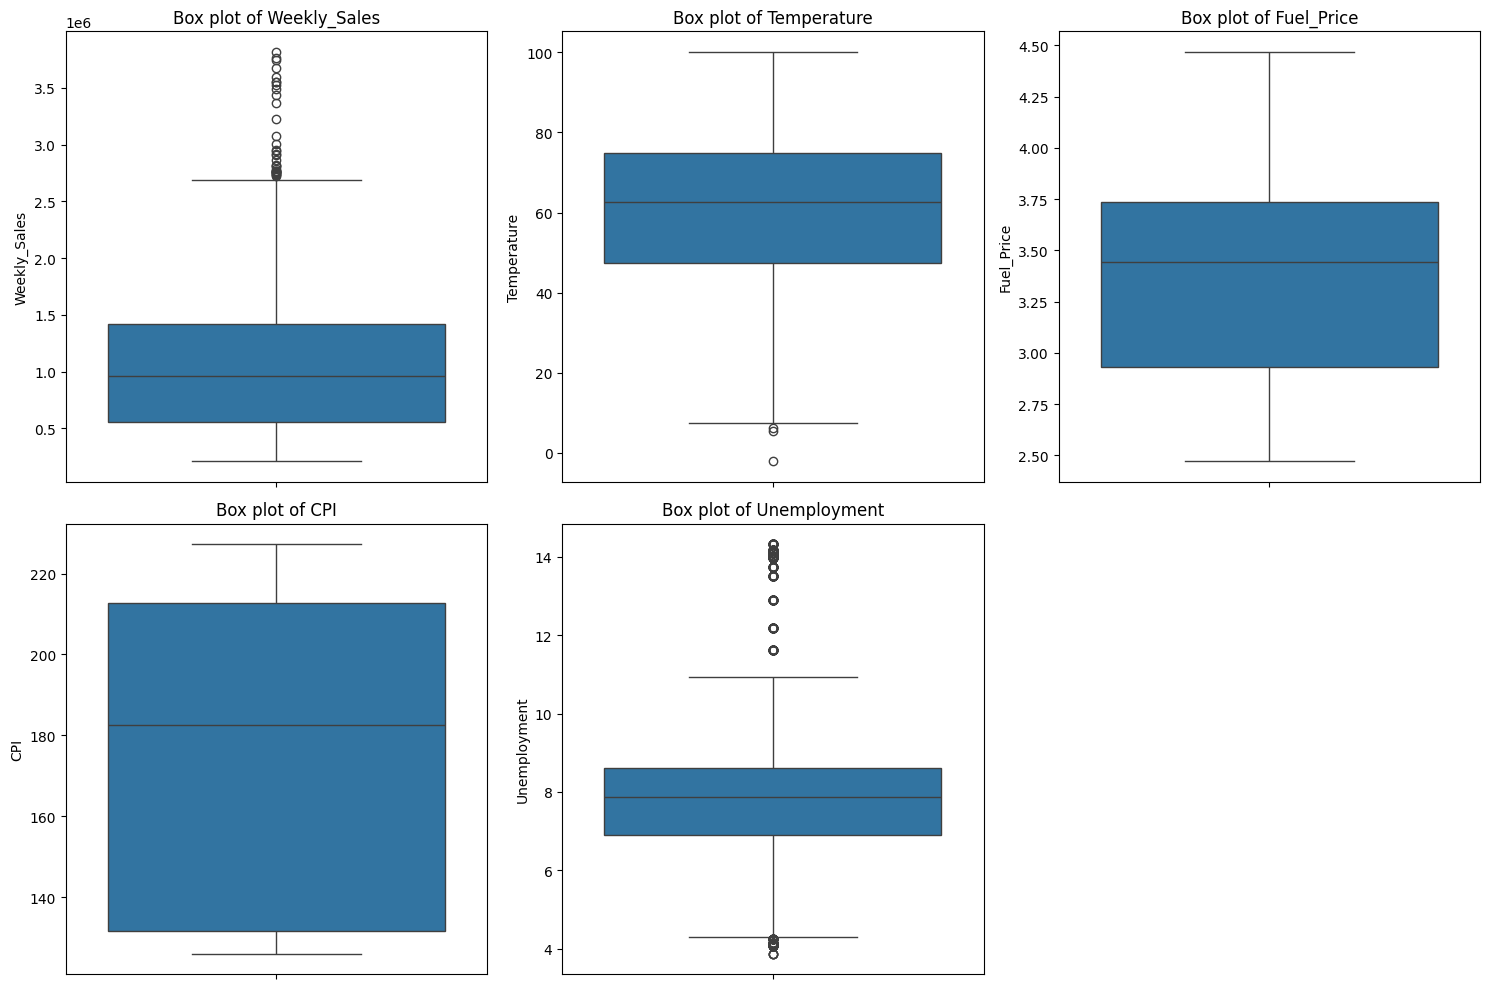

Box plots for numerical features displayed to visualize outliers.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()
print("Box plots for numerical features displayed to visualize outliers.")

**Step5**:
To ensure data consistency, the 'Date' column must first be converted to a datetime object. This standardizes the date format and allows for proper temporal analysis, such as checking for duplicates and weekly frequency.



In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
print("Date column converted to datetime objects. Displaying info to confirm data types:")
df.info()

Date column converted to datetime objects. Displaying info to confirm data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


**Step6**:
Now that the 'Date' column has been correctly formatted, I will check for duplicate entries based on the 'Store' and 'Date' combination, as duplicate entries would indicate data quality issues and break the time-series assumption for unique weekly records.



In [11]:
duplicate_entries = df.duplicated(subset=['Store', 'Date']).sum()
print(f"Number of duplicate 'Store' and 'Date' combinations: {duplicate_entries}")

if duplicate_entries == 0:
    print("No duplicate 'Store' and 'Date' combinations found, indicating consistent unique weekly records per store.")
else:
    print("Duplicate 'Store' and 'Date' combinations found. Further investigation or data cleaning is required.")

Number of duplicate 'Store' and 'Date' combinations: 0
No duplicate 'Store' and 'Date' combinations found, indicating consistent unique weekly records per store.


**Step7**:
To ensure weekly frequency, I will group the data by 'Store' and then calculate the difference between consecutive dates. This will verify if each store consistently has weekly records.



In [12]:
df_sorted = df.sort_values(by=['Store', 'Date']).copy()
df_sorted['Date_Diff'] = df_sorted.groupby('Store')['Date'].diff().dt.days

# Check if all date differences are 7 for non-first entries in each store group
inconsistent_frequency = df_sorted[df_sorted['Date_Diff'].notna() & (df_sorted['Date_Diff'] != 7)]

print(f"Number of inconsistent weekly frequencies found: {len(inconsistent_frequency)}")

if len(inconsistent_frequency) == 0:
    print("Weekly frequency is consistent across all stores (each record is exactly 7 days apart from the previous one for the same store).")
else:
    print("Inconsistent weekly frequencies found. Displaying first 5 inconsistent entries:")
    print(inconsistent_frequency.head())


Number of inconsistent weekly frequencies found: 0
Weekly frequency is consistent across all stores (each record is exactly 7 days apart from the previous one for the same store).


**Step8**:
To assess potential biases and understand if certain stores dominate the dataset, I will count the number of records for each store and display the distribution. This will help determine if data is evenly distributed across all stores.



Distribution of records per store:
Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: count, dtype: int64


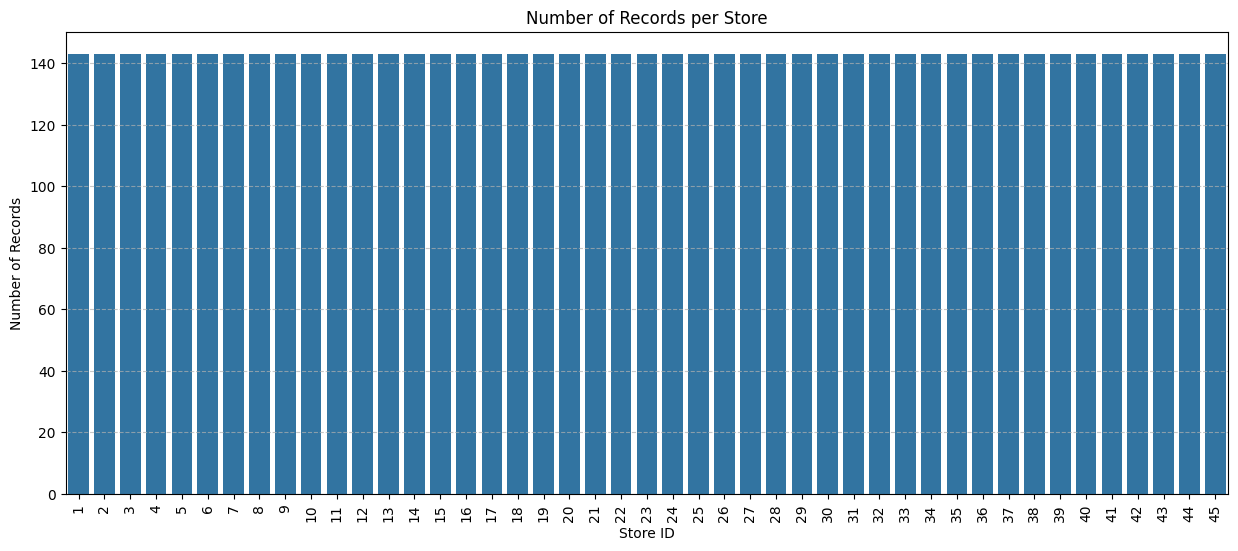

Observation: All stores have an equal number of records (143 weeks), indicating no bias in data volume across stores.


In [13]:
print("Distribution of records per store:")
store_counts = df['Store'].value_counts().sort_index()
print(store_counts)

# Visualize the distribution of records per store
plt.figure(figsize=(15, 6))
sns.barplot(x=store_counts.index, y=store_counts.values)
plt.title('Number of Records per Store')
plt.xlabel('Store ID')
plt.ylabel('Number of Records')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Observation: All stores have an equal number of records (143 weeks), indicating no bias in data volume across stores.")

### Data Relevancy Validation

The focus is on including variables that directly influence weekly sales behavior and excluding irrelevant data that might introduce noise.

Currently, the `df` DataFrame contains the following columns:
- `Store`: Identifies the specific retail location, crucial for store-level forecasting.
- `Date`: Provides the temporal context, essential for time series analysis.
- `Weekly_Sales`: This is the target variable we aim to predict.
- `Holiday_Flag`: Acts as a **holiday indicator**, capturing the impact of significant sales events.
- `Temperature`: Represents **weather data**, which can influence customer traffic and sales patterns.
- `Fuel_Price`: An **economic indicator** that can affect consumer spending and operational costs.
- `CPI` (Consumer Price Index): Another **economic indicator** reflecting inflation and purchasing power.
- `Unemployment` Rate: A key **economic indicator** that impacts consumer confidence and spending.

While "Lag Sales" are mentioned as a relevant feature to be engineered later, the existing columns (`Holiday_Flag`, `Temperature`, `Fuel_Price`, `CPI`, `Unemployment`) align perfectly with the categories of relevant features identified in the problem statement. These features are all expected to have a direct influence on weekly sales and are therefore considered relevant and not noise-inducing for the forecasting task.

### Temporal Considerations Analysis

Time series forecasting for Walmart weekly sales requires careful handling of temporal aspects:

#### 1. Importance of Seasonality, Trend, and Time-Based Splitting:

*   **Seasonality:** Weekly sales data for retail businesses inherently exhibits strong seasonality. This includes **yearly sales cycles** (e.g., increased sales during holidays like Christmas, Thanksgiving, or Black Friday) and other recurring patterns. Identifying and modeling these seasonal patterns is crucial for accurate forecasts, as they significantly impact sales volumes.
*   **Trend:** Sales data can also show a **trend**, indicating an overall upward or downward movement in sales over longer periods. This could be due to store growth, market changes, or economic factors. Capturing this trend allows the model to understand the long-term direction of sales.
*   **Time-Based Splitting:** Due to the inherent temporal dependency in time series data, it is imperative to use **time-based splitting** for preparing training and testing datasets. This means that the training data must always precede the testing data chronologically. This approach simulates the real-world scenario where a model trained on past data predicts future outcomes.

#### 2. Random Train-Test Split vs. Time-Aware Cross-Validation:

*   **Why Random Train-Test Split is Inappropriate:** A random train-test split destroys the temporal order of the data. If future data points are included in the training set (e.g., sales from December 2012 being used to predict sales in July 2012), the model would be learning from future information, leading to an artificially inflated performance and unreliable predictions in a real-world deployment. This is known as **data leakage**.
*   **Why Time-Aware Cross-Validation is Necessary:** To robustly evaluate a time series model, **time-aware cross-validation** (e.g., rolling-origin or expanding-window validation) is essential. This method ensures that the model is always trained on historical data and tested on subsequent, unseen data, respecting the chronological order. This provides a more realistic assessment of the model's generalization capability.

#### 3. Concept Drift and Implications for Model Retraining:

*   **Concept Drift:** In the context of weekly sales forecasting, **concept drift** refers to the phenomenon where the underlying relationships between input features and weekly sales, or the inherent sales behavior itself, changes over time. This could be driven by evolving customer preferences, new market trends, economic shifts, new competitors, or changes in store policies.
*   **Implications for Model Retraining:** When concept drift occurs, a model trained on older data may become outdated and lose its predictive accuracy. Therefore, **periodic retraining** of the model is critical. The problem statement explicitly mentions the need for retraining, suggesting a schedule like monthly or quarterly. Continuous monitoring of model performance (e.g., tracking MAPE drift) is necessary to detect when concept drift is significantly impacting accuracy, triggering a need for retraining with more recent data to ensure the model remains relevant and accurate.

### Legal and Ethical Compliance Review

The current dataset is in compliance with standard data protection guidelines because:

1.  **Absence of PII:** The dataset explicitly *does not* include customer names, personal identifiers, or any sensitive personal data. This inherently mitigates major privacy risks and simplifies compliance with regulations like GDPR or CCPA, as these regulations primarily focus on the protection of personally identifiable information.

In a real-world deployment, additional general considerations for data privacy and governance would include:

*   **Compliance with Data Privacy Regulations:** Ensuring strict adherence to all applicable data privacy regulations relevant to the operating region.
*   **Avoiding PII Storage:** Proactive measures to prevent the collection or storage of Personally Identifiable Information (PII) within the forecasting dataset.
*   **Corporate Data Governance Policies:** Compliance with internal corporate policies and standards for data handling, storage, and access.
*   **Anonymization Techniques:** For any future datasets that might contain sensitive attributes, applying techniques like normalization, standardization, removal of sensitive identifiers, encryption of stored data, or other anonymization methods would be crucial.

### Sampling Strategy Evaluation

Section of the problem statement and our analysis of the dataset:

1.  **Current Dataset Manageability**: The dataset, with `6435` entries (as confirmed by `df.info()` in previous steps), is considered **manageable** for this project. This size does not necessitate sampling to handle computational costs or memory limitations on typical development environments.

2.  **Sampling for Enterprise Environments**: While not required for this specific project's dataset, it is crucial to acknowledge that in larger, real-world enterprise environments with significantly more data (e.g., millions or billions of records across many more stores and years), sampling strategies would become essential.
    *   **Store-wise sampling** could be used to select a representative subset of stores for model development or initial training.
    *   **Time-based sampling** (e.g., using rolling windows or specific periods) could be employed to reduce the volume of historical data processed, especially when dealing with very long time series.

**Conclusion**: For the current scope, no sampling strategy is required, allowing the full dataset to be used. However, the considerations for sampling in larger, production-scale deployments are noted for future scalability.

### Data Privacy Techniques Review

In real-world applications, **data privacy is paramount**, even if the current dataset being used for development or testing does not contain Personally Identifiable Information (PII). Establishing robust data privacy practices from the outset ensures compliance with regulations (e.g., GDPR, CCPA), maintains customer trust, and mitigates risks associated with data breaches or misuse. While the provided Walmart sales dataset lacks PII, understanding and documenting these techniques is crucial for future projects or when incorporating additional data sources.

Here are some potential data privacy techniques:

#### 1. Normalization and Standardization
These are data transformation techniques primarily used for feature scaling, but they can indirectly aid privacy by obscuring the original scale and distribution of sensitive numerical data.

*   **Min-Max Scaling**: Scales features to a fixed range, typically 0 to 1. The formula is: `X_scaled = (X - X_min) / (X_max - X_min)`. This method transforms the data without changing its inherent distribution.
*   **Z-Score Standardization**: Scales features to have a mean of 0 and a standard deviation of 1. The formula is: `X_scaled = (X - mean) / standard_deviation`. This is useful when the data has outliers and preserves the shape of the original distribution.

**Privacy Implication**: While not direct anonymization, these methods transform raw numerical values into a standardized or normalized range, making it harder to infer original values directly without access to the scaling parameters. This can be a part of a larger privacy strategy, especially when sharing statistical aggregates or models.

#### 2. Removal of Sensitive Identifiers
This is a fundamental technique for anonymization and de-identification, aiming to eliminate any data points that could directly or indirectly identify an individual.

*   **Direct Identifiers**: Information like names, social security numbers, email addresses, phone numbers, or specific account IDs should be removed or tokenized.
*   **Indirect Identifiers**: Combinations of less sensitive information (e.g., age, zip code, gender) can sometimes uniquely identify an individual. Techniques like generalization (e.g., grouping ages into ranges), suppression (removing certain data points), or k-anonymity (ensuring each record is indistinguishable from at least k-1 other records) are used to mitigate this risk.

**Privacy Implication**: This is a direct approach to protecting privacy by ensuring that individual records cannot be traced back to specific persons. For a project like Walmart sales forecasting, this would mean ensuring no customer transaction data with personal details is used.

#### 3. Encryption
Encryption is a cryptographic method to secure data by converting it into a coded format, making it unreadable without the correct decryption key. It's crucial for protecting data at various stages:

*   **Data at Rest**: Encrypting data stored on databases, hard drives, or cloud storage prevents unauthorized access if the storage medium is compromised.
*   **Data in Transit**: Encrypting data during transfer over networks (e.g., using SSL/TLS for web traffic) protects against eavesdropping.
*   **Homomorphic Encryption**: An advanced technique that allows computations to be performed on encrypted data without decrypting it first, offering strong privacy guarantees while enabling analysis.

**Privacy Implication**: Encryption provides a strong layer of security, safeguarding data from unauthorized disclosure. Even if encrypted data is accessed, it remains unintelligible without the proper keys. This is critical for both sensitive and non-sensitive data in production systems.



### Data Collection Tools

In a real-world production system, particularly for a large-scale retail operation like Walmart, various sophisticated tools would be employed for robust and continuous data collection:

*   **SQL Databases (e.g., PostgreSQL, MySQL):** These are fundamental for storing structured transactional data from Point of Sale (POS) systems, ERPs, and other internal operational systems. They provide reliable storage and retrieval for sales, inventory, and store-specific information.
*   **Cloud Storage (e.g., AWS S3, GCP Storage):** Used for storing large volumes of raw and processed data, especially for historical archives, data lakes, and as a staging area for ETL processes. This offers scalability, durability, and integration with other cloud services.
*   **REST APIs:** Essential for integrating with external data sources. For instance, APIs would be used to fetch economic indicators (CPI, Unemployment from government sources), weather data (Temperature), and fuel prices.
*   **Automated ETL (Extract, Transform, Load) Pipelines:** These pipelines are crucial for moving data from various source systems, transforming it into a usable format, and loading it into analytical databases or data warehouses. Tools like Apache Spark or custom Python scripts are often used.
*   **Airflow for Scheduling:** For orchestrating complex data workflows, Apache Airflow (or similar job schedulers) would manage and schedule the execution of ETL jobs, API calls, and data validation tasks, ensuring timely and consistent data availability.
*   **Web Scraping:** While less common for core transactional data, web scraping might be employed for gathering less structured external data, such as competitive pricing, local event calendars, or specific economic news not readily available via APIs.

For the *current project*, the data has been conveniently provided as a single CSV file (`Walmart.csv`). This simplifies the initial data access, meaning the setup and management of these advanced data collection tools are not directly implemented within this notebook but are crucial considerations for a real-world deployment.

### Data Versioning Strategy

Data versioning is a crucial aspect of machine learning projects, especially in the context of continuous data collection and model retraining. It ensures **reproducibility**, provides clear **audit trails**, and enables robust **performance comparison** across different iterations of data.

#### Importance of Data Versioning:
-   **Reproducibility**: Guarantees that any experiment or model training can be re-run with the exact same dataset, preventing 'works on my machine' issues.
-   **Audit Trails**: Provides a historical record of all data changes, which is vital for compliance, debugging, and understanding model behavior over time.
-   **Performance Comparison**: Allows comparing model performance metrics and insights from different data versions, helping to track improvements or regressions.

#### Key Components of a Data Versioning Strategy:
1.  **Maintaining Version Numbers**: Assigning unique version identifiers to datasets (e.g., `v1.0`, `v1.1`, `v2.0`). This helps in tracking changes and referencing specific dataset states.
2.  **Separating Raw and Processed Datasets**: Always store raw, immutable data separately from processed, transformed datasets. This ensures that the original source data is preserved and any processing errors can be traced back without affecting the raw input.
    -   **Raw Data**: The original, untransformed data collected from sources.
    -   **Processed Data**: Data after cleaning, feature engineering, and other transformations.
3.  **Utilizing Specific Tools**: Employing specialized tools designed for data versioning and MLOps:
    -   **DVC (Data Version Control)**: An open-source tool that works with Git to version data files and machine learning models, treating them like code. It helps manage large files and directories efficiently.
    -   **MLflow**: An open-source platform for managing the end-to-end machine learning lifecycle, including experiment tracking, model packaging, and model deployment. MLflow can log data versions and associated metadata with runs.
    -   Other tools like Git LFS (Large File Storage) or custom solutions leveraging cloud storage with versioning capabilities can also be used.

#### Conclusion:
By implementing a robust data versioning strategy, Walmart can ensure that its weekly sales forecasting models are always built on known, traceable data. This supports effective model debugging, enables seamless collaboration among data scientists, and ultimately leads to more reliable and trustworthy predictions over time.

### 1. Importance of Continuous Data Collection

Continuous data collection is crucial for maintaining the long-term accuracy and relevance of the forecasting model. It enables the model to:

*   **Adapt to changing customer behavior**: Sales patterns are not static; they evolve due to economic shifts, seasonal preferences, competitive actions, and marketing strategies.
*   **Incorporate new trends**: Fresh data allows the model to learn from emerging trends and adjust its predictions accordingly.
*   **Maintain accuracy over time**: Without updated data, models can suffer from concept drift, where the relationship between input features and the target variable changes, leading to degraded performance.
*   **Ensure reliability**: Regularly feeding new data into the system ensures that the forecasts are based on the most current realities, making them more reliable for business decisions.

### 2. Process for Regularly Collecting New Weekly Sales Data

The continuous collection of new weekly sales data is a fundamental component of keeping the forecasting model current and accurate. This process would typically involve an automated pipeline:

*   **Automated ETL Pipelines**: Data from Point of Sale (POS) systems, internal sales databases, and ERP systems would be extracted, transformed, and loaded (ETL) into a data warehouse or data lake on a weekly basis, typically after the close of the last business day of the week.
*   **External Data Integration**: Concurrently, automated scripts or API calls would fetch updated external data:
    *   **Government Economic Data**: New CPI and Unemployment Rate figures would be retrieved as they are released (e.g., monthly).
    *   **Weather Data**: Updated temperature forecasts and historical actuals would be collected.
    *   **Fuel Price Data**: Latest fuel prices would be ingested.
    *   **Holiday Calendars**: An updated holiday calendar would be integrated to capture future holiday flags.
*   **Data Validation and Cleansing**: Before being fed to the model, newly collected data would undergo initial quality checks, similar to the `2.4 Data Quality` discussed previously:
    *   Verify completeness (no missing weeks/stores).
    *   Check for anomalies or outliers.
    *   Ensure data type consistency.
*   **Storage and Versioning**: The newly collected and validated data would be appended to the existing historical dataset, following data versioning best practices (`2.11 Data Versioning`). This ensures an auditable history and reproducibility.

This robust collection mechanism ensures that the model always has access to the most recent information, which is critical for making relevant and timely forecasts.

### 3. Strategy for Periodic Model Retraining

To ensure the model remains accurate and adapts to concept drift, periodic retraining is essential. The chosen frequency should balance computational cost with the need for up-to-date predictions.

*   **Recommended Frequencies**:
    *   **Monthly Retraining**: This is a good baseline for retail forecasting. Monthly retraining allows the model to quickly adapt to recent sales trends, economic changes, and minor shifts in seasonality or promotional impacts. It ensures that forecasts for the upcoming month are based on the latest available data.
    *   **Quarterly Retraining (Seasonal Retraining)**: For longer-term planning or if sales patterns exhibit strong quarterly seasonality, retraining every quarter can be highly effective. This allows the model to learn from full seasonal cycles as they complete and adapt to broader economic shifts that might manifest over several months. It's particularly useful for capturing changes in buying habits that occur across different seasons.
    *   **Ad-hoc Retraining**: Beyond scheduled retraining, the model should also be retrained if significant events occur (e.g., a major economic downturn/boom, the launch of a new product line, a competitor's major campaign) or if monitoring indicates a significant drop in performance (MAPE drift).

*   **Reasoning Behind Schedule**:
    *   **Concept Drift**: Sales behavior and market conditions are dynamic. Retraining periodically helps the model counter concept drift, preventing its predictive power from degrading over time.
    *   **New Feature Learning**: New data brings new patterns, trends, and sometimes new holiday effects. Retraining allows the model to incorporate these learnings.
    *   **Feature Engineering Updates**: If new features are engineered (e.g., new lag features, new external indicators), retraining is necessary to integrate these into the model.
    *   **Balancing Cost and Accuracy**: Very frequent retraining (e.g., daily) might be computationally expensive without significant gains, while infrequent retraining (e.g., annually) risks making the model stale. Monthly or quarterly strikes a good balance for typical retail forecasting needs.

### 4. Monitoring Model Performance

Continuous monitoring of the model's performance is paramount to detect when retraining is necessary and to ensure the model continues to meet business objectives. The primary focus for monitoring will be on the evaluation metrics defined in `1.4 Evaluation Metrics`.

*   **Tracking MAPE (Mean Absolute Percentage Error) Drift**:
    *   **Calculation**: Weekly, or after each new prediction cycle, calculate the MAPE of the model's predictions against the actual weekly sales for the most recent period (e.g., the past 4 weeks, or since the last retraining cycle).
    *   **Thresholds**: Establish acceptable thresholds for MAPE. For instance, a baseline MAPE of 10% might be considered acceptable, with a trigger for investigation or retraining if MAPE consistently exceeds 12-15% over several consecutive weeks.
    *   **Visualization**: Plot MAPE over time (e.g., a rolling average MAPE) on a dashboard. This provides a clear visual trend of performance, making it easier to spot gradual degradation or sudden drops in accuracy.
    *   **Segmented Monitoring**: Monitor MAPE at different granularities: overall, per store, per holiday/non-holiday period. This helps identify specific areas where the model might be underperforming.

*   **Detecting Overall Performance Degradation**:
    *   **Comparative Analysis**: Compare the current model's performance (e.g., MAPE, RMSE) against its performance immediately after the last retraining, or against a benchmark model.
    *   **Prediction vs. Actuals Plot**: Regularly visualize actual sales versus predicted sales. Significant and consistent deviations (e.g., consistent under-prediction or over-prediction) indicate degradation.
    *   **Residual Analysis**: Analyze the residuals (actual - predicted). Changes in the distribution of residuals (e.g., increasing variance, new biases) suggest performance issues.
    *   **Data Drift Monitoring**: Beyond output performance, monitor changes in the distribution of input features (data drift). Significant changes in temperature, fuel prices, CPI, or unemployment rates that deviate from historical training data distributions could indicate that the model's underlying assumptions are no longer valid, signaling a need for retraining even before MAPE significantly degrades.
    *   **Alerting System**: Implement automated alerts (e.g., email, Slack notifications) that trigger when MAPE exceeds predefined thresholds or when other performance metrics show significant degradation. This ensures prompt attention from data scientists or operations teams.

By systematically monitoring these indicators, the team can proactively identify when the model is losing its predictive power and schedule retraining or deeper investigation to maintain optimal forecasting accuracy.

## Re-confirm Missing Values




**Reasoning**:
To re-confirm the absence of missing values, I will print the sum of missing values for each column using `df.isnull().sum()`. This directly addresses the first instruction of the subtask.



In [14]:
print("Re-confirming missing values per column:")
print(df.isnull().sum())

Re-confirming missing values per column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


## Handle Outliers in Numerical Features


**Reasoning**:
First, I'll define the `cap_outliers_iqr` function as instructed, which will calculate the IQR bounds and cap the outliers in a given pandas Series. This function is essential for the outlier handling strategy.



In [15]:
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

print("Function 'cap_outliers_iqr' defined successfully.")

Function 'cap_outliers_iqr' defined successfully.


**Reasoning**:
Now that the `cap_outliers_iqr` function is defined, I will create a copy of the original DataFrame, apply the outlier capping function to the specified numerical columns in the new DataFrame, and then visualize the original and capped distributions using box plots to show the effect of outlier handling.



Outliers in specified numerical columns have been capped in 'df_processed'.


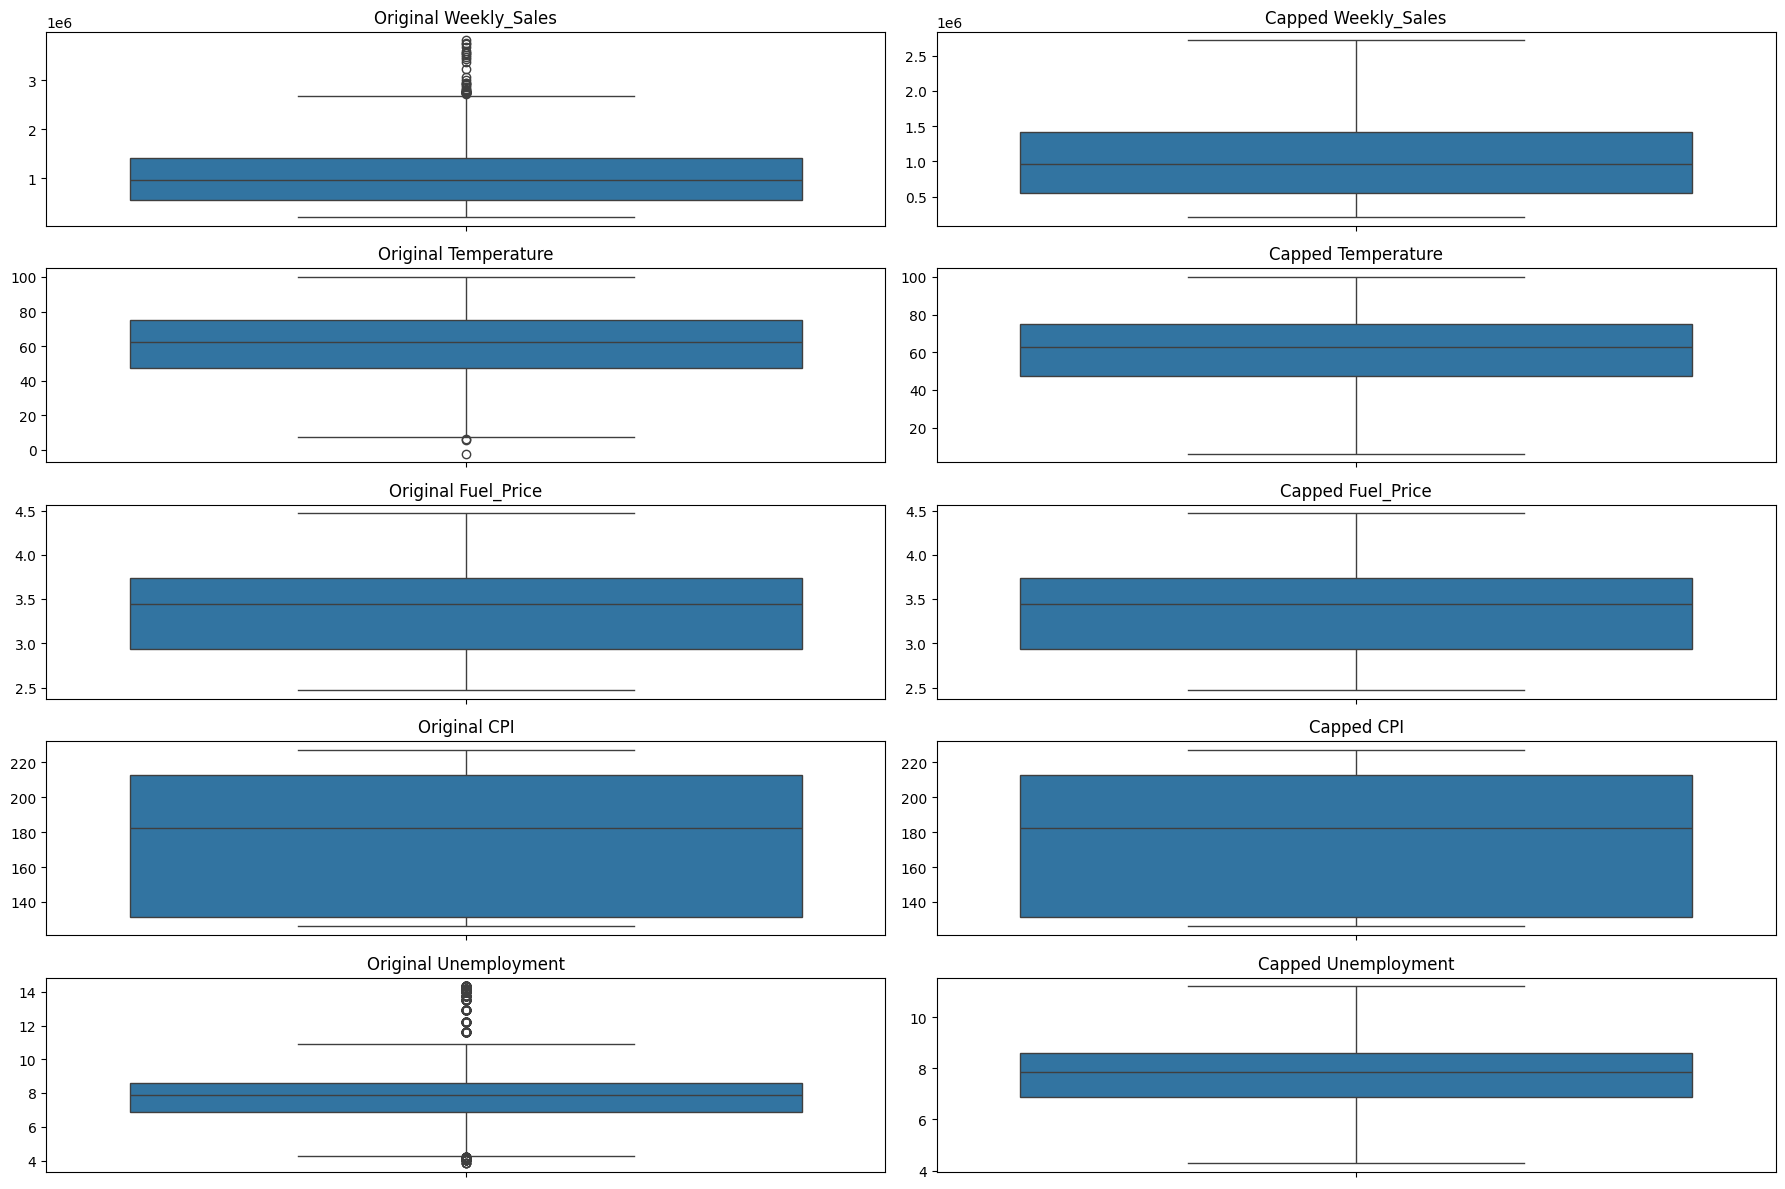

Box plots displaying the effect of outlier capping have been shown.


In [16]:
df_processed = df.copy()
numerical_cols_for_outlier_handling = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for col in numerical_cols_for_outlier_handling:
    df_processed[col] = cap_outliers_iqr(df_processed[col])
print("Outliers in specified numerical columns have been capped in 'df_processed'.")

# Visualize the effect of outlier capping
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols_for_outlier_handling):
    plt.subplot(len(numerical_cols_for_outlier_handling), 2, 2 * i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Original {col}')
    plt.ylabel('')

    plt.subplot(len(numerical_cols_for_outlier_handling), 2, 2 * i + 2)
    sns.boxplot(y=df_processed[col])
    plt.title(f'Capped {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

print("Box plots displaying the effect of outlier capping have been shown.")

## Encode Categorical Features


**Reasoning**:
The 'Holiday_Flag' column is already in a binary numerical format (0s and 1s), so no explicit encoding is required for it. I will confirm its unique values to illustrate this point.



In [17]:
print("Unique values for 'Holiday_Flag' column:")
print(df_processed['Holiday_Flag'].unique())

print("Holiday_Flag is already binary (0 or 1), so no further encoding is needed for this feature.")

Unique values for 'Holiday_Flag' column:
[0 1]
Holiday_Flag is already binary (0 or 1), so no further encoding is needed for this feature.


**Reasoning**:
Now, I will apply One-Hot Encoding to the 'Store' column to convert it into a numerical format suitable for machine learning models. I will create new columns for each store, drop the original 'Store' column to avoid multicollinearity, and display the first few rows of the updated DataFrame to show the new encoded features.



In [18]:
df_processed = pd.get_dummies(df_processed, columns=['Store'], prefix='Store', dtype=int)

print("'Store' column has been One-Hot Encoded.")
print("Displaying the head of df_processed with new encoded features:")
df_processed.head()

'Store' column has been One-Hot Encoded.
Displaying the head of df_processed with new encoded features:


,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apply Data Transformations to Numerical Features



### Instructions:
1.  **Check for Skewness**: For each of the numerical features ('Temperature', 'Fuel_Price', 'CPI', 'Unemployment'), calculate and print its skewness. If a feature shows significant skewness (e.g., absolute skewness value > 0.5 or 1, depending on typical thresholds), consider a log transformation.
2.  **Apply Log Transformation (if needed)**: For features identified as highly skewed, apply a natural logarithm transformation (using `np.log1p` to handle zero values gracefully).
3.  **Standardize/Normalize Features**: After handling skewness (or if skewness was not an issue), apply a StandardScaler or MinMaxScaler to transform the selected numerical features. Choose StandardScaler if the data generally follows a normal distribution or if outliers have been effectively capped, and MinMaxScaler if you need to scale to a specific range (e.g., 0-1).
4.  **Visualize Distributions**: Plot histograms of the original, log-transformed (if applied), and scaled features to show the effect of the transformations.
5.  **Display Transformed DataFrame**: Show the head of `df_processed` after all transformations.

**Reasoning**:
As per the instructions, the first step is to check for skewness in the specified numerical features. I will calculate and print the skewness for 'Temperature', 'Fuel_Price', 'CPI', and 'Unemployment' from the `df_processed` DataFrame.



In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_cols_for_transformation = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

print("Skewness before transformation:")
for col in numerical_cols_for_transformation:
    skewness = df_processed[col].skew()
    print(f"  {col}: {skewness:.4f}")


Skewness before transformation:
  Temperature: -0.3350
  Fuel_Price: -0.0962
  CPI: 0.0635
  Unemployment: 0.1832


**Reasoning**:
Based on the previously calculated skewness values (all close to zero), no log transformation is needed. Therefore, the next step is to apply StandardScaler to the numerical features ('Temperature', 'Fuel_Price', 'CPI', 'Unemployment') to standardize them. This ensures they have a mean of 0 and a standard deviation of 1, making them equally weighted in model training. After scaling, I will display the head of the DataFrame to show the transformed values and then visualize the distributions to confirm the scaling.



Numerical features have been standardized using StandardScaler.

Displaying the head of df_processed after scaling:
        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
0 2010-02-05    1643690.90             0    -0.995450   -1.713800  1.004175   
1 2010-02-12    1641957.44             1    -1.201534   -1.766089  1.007880   
2 2010-02-19    1611968.17             0    -1.124524   -1.840166  1.009074   
3 2010-02-26    1409727.59             0    -0.761165   -1.737766  1.009849   
4 2010-03-05    1554806.68             0    -0.768215   -1.598328  1.010624   

   Unemployment  Store_1  Store_2  Store_3  ...  Store_36  Store_37  Store_38  \
0       0.15441        1        0        0  ...         0         0         0   
1       0.15441        1        0        0  ...         0         0         0   
2       0.15441        1        0        0  ...         0         0         0   
3       0.15441        1        0        0  ...         0         0         0   
4   

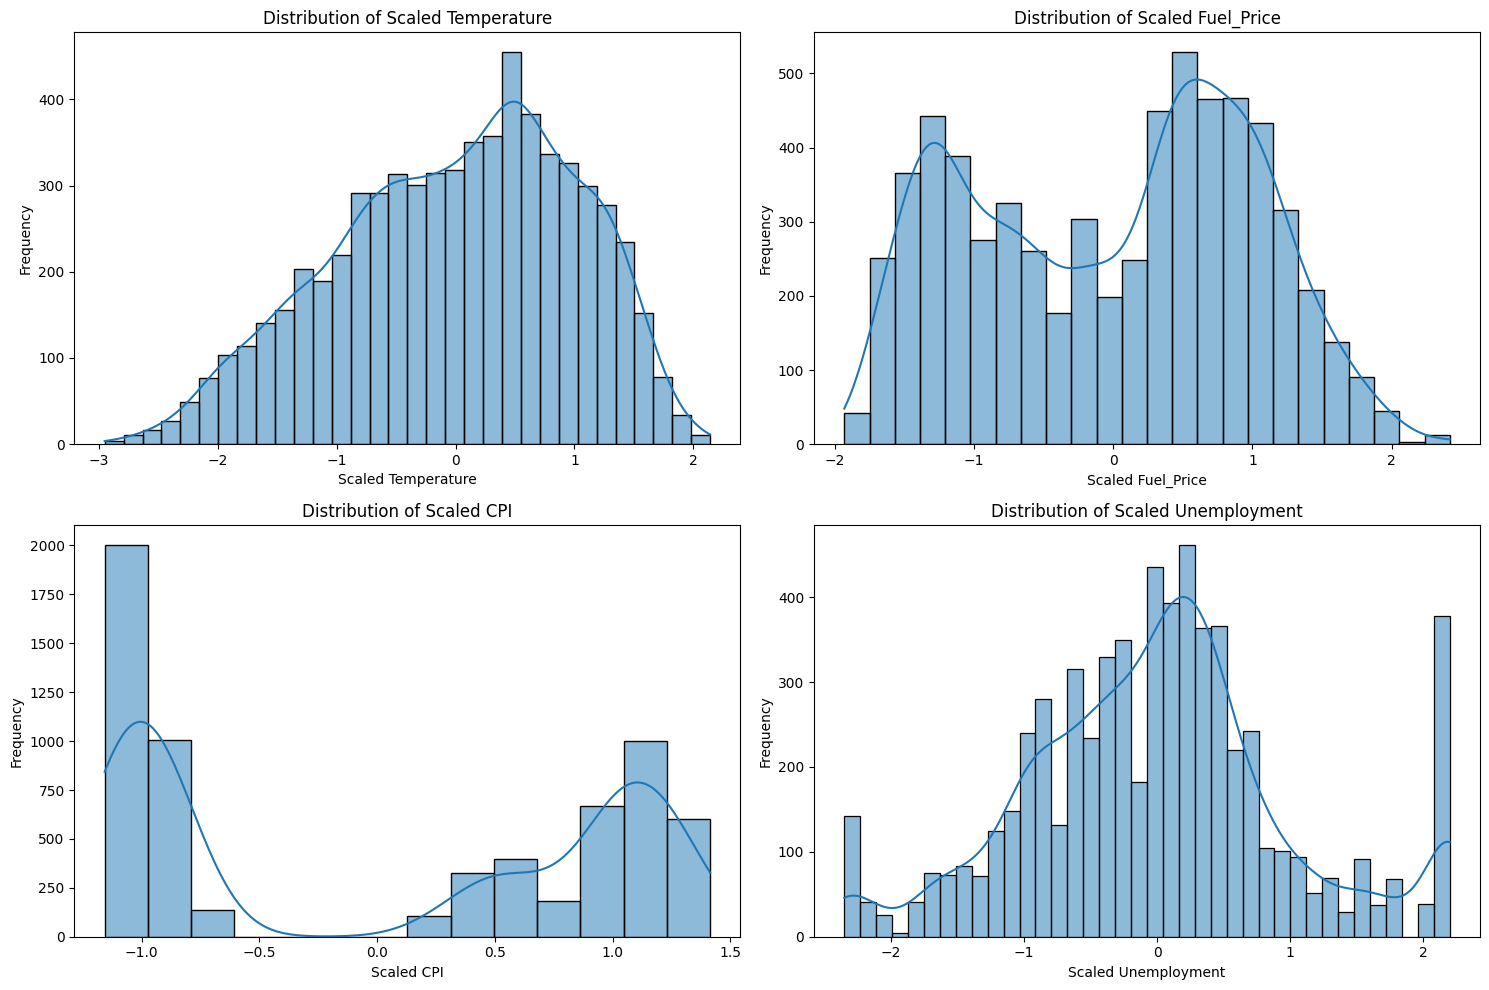

Histograms of scaled numerical features have been displayed.


In [20]:
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df_processed[numerical_cols_for_transformation] = scaler.fit_transform(df_processed[numerical_cols_for_transformation])
print("Numerical features have been standardized using StandardScaler.")

print("\nDisplaying the head of df_processed after scaling:")
print(df_processed.head())

# Visualize distributions after scaling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_transformation):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid as needed
    sns.histplot(df_processed[col], kde=True)
    plt.title(f'Distribution of Scaled {col}')
    plt.xlabel(f'Scaled {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms of scaled numerical features have been displayed.")

## Irrelevance of Imbalanced Datasets and Data Reduction

### 1. Imbalanced Datasets

In this project, we are tackling a **time series regression problem**, where the goal is to predict a continuous numerical value (`Weekly_Sales`). The concept of "imbalanced datasets" is primarily relevant in **classification problems**, where one class significantly outnumbers other classes (e.g., detecting rare fraud cases vs. common legitimate transactions). In such scenarios, models might become biased towards the majority class, leading to poor performance on minority classes.

For a regression task like forecasting weekly sales, there aren't distinct classes to be imbalanced. While sales values can vary widely, this is a natural characteristic of the target variable and is handled through appropriate regression models and error metrics (like RMSE and MAPE, which penalize errors across the spectrum of sales values). Therefore, techniques designed for imbalanced classification datasets (e.g., SMOTE, oversampling, undersampling) are not applicable or necessary here.

### 2. Data Reduction Techniques

Data reduction techniques (e.g., dimensionality reduction methods like PCA, or sampling strategies) are typically employed in scenarios where:

*   **Computational resources are constrained**: When dealing with extremely large datasets (millions or billions of rows/features) that are too slow or memory-intensive to process.
*   **High dimensionality**: When the number of features is excessively high, leading to the "curse of dimensionality," increased model complexity, and potential overfitting.
*   **Noise reduction**: To remove redundant or irrelevant features that might degrade model performance.

For this Walmart sales forecasting project:

*   **Dataset Size**: The dataset contains 6,435 entries and, after one-hot encoding, has 52 columns. This is a **manageable size** that does not pose significant computational or memory challenges for modern computing environments, making explicit data reduction for performance reasons unnecessary.
*   **Dimensionality**: While one-hot encoding expanded the `Store` column into 45 new columns, the total number of features (including date components which will be added later) remains well within reasonable limits for most machine learning models. We also confirmed earlier that all stores had an equal number of records, indicating no bias in data volume across stores, which might otherwise necessitate sampling.
*   **Feature Relevance**: The features included (Temperature, Fuel Price, CPI, Unemployment, Holiday Flag, Store ID) are all considered **highly relevant** for predicting weekly sales, as discussed in the problem definition. Reducing these features prematurely might lead to a loss of valuable predictive information rather than noise reduction.

Therefore, applying data reduction techniques at this stage would likely be counterproductive, potentially removing useful information without offering substantial benefits in terms of performance or computational efficiency for this specific problem.

## Summary of Data Preprocessing Steps Undertaken

So far, the data preprocessing has focused on cleaning, structuring, and transforming the data to prepare it for machine learning models. The steps completed are:

1.  **Data Loading**: The dataset was loaded into a pandas DataFrame from a CSV file.
2.  **Missing Value Check**: Confirmed there were no missing values in any of the columns.
3.  **Outlier Identification and Handling**: Identified potential outliers in numerical features (`Weekly_Sales`, `Temperature`, `Fuel_Price`, `CPI`, `Unemployment`) using descriptive statistics and box plots. Outliers were then capped using the Interquartile Range (IQR) method to mitigate their impact on model training.
4.  **Date Column Transformation**: Converted the `Date` column to datetime objects to enable time-series specific operations.
5.  **Duplicate Check**: Verified that there were no duplicate entries based on `Store` and `Date` combinations, ensuring unique weekly records per store.
6.  **Weekly Frequency Consistency Check**: Confirmed that data for each store consistently had a weekly frequency (7-day intervals).
7.  **Data Distribution Check**: Assessed the distribution of records per store, confirming an equal number of records (143 weeks) for all 45 stores, indicating no bias in data volume.
8.  **Categorical Feature Encoding**: The `Holiday_Flag` was already binary and required no action. The `Store` ID was One-Hot Encoded, converting it into a numerical format suitable for machine learning algorithms, and the original `Store` column was dropped.
9.  **Numerical Feature Scaling**: Checked skewness for `Temperature`, `Fuel_Price`, `CPI`, and `Unemployment`. Since no significant skewness was detected, a `StandardScaler` was applied to these features to standardize them (mean=0, variance=1), ensuring they contribute equally to the model without being disproportionately influenced by their original scales.

## Address Handling Imbalanced Dataset



#### Explanation:
Techniques designed to handle imbalanced datasets (such as SMOTE, oversampling, or undersampling) are primarily applicable to **classification problems**, where the goal is to predict a categorical outcome and one class is significantly underrepresented compared to others. These methods aim to balance the class distribution to prevent the model from being biased towards the majority class.

However, the current problem is a **time series regression task**, where the objective is to predict a continuous numerical value (`Weekly_Sales`). In regression, there are no discrete classes to be imbalanced. While sales data might have certain periods of unusually high or low sales (which could be considered 'outliers' or 'extreme values' but not 'imbalanced classes'), these are handled through outlier capping, transformations, or robust regression models, rather than classification-specific balancing techniques.

Therefore, applying methods for imbalanced datasets in this context would be inappropriate and not beneficial for improving the accuracy of weekly sales forecasts. No specific coding steps will be implemented for handling imbalanced datasets.

## Address Data Reduction Techniques



#### Explanation:
Data reduction techniques, such as Principal Component Analysis (PCA), feature selection, or sampling, are typically employed when dealing with very large datasets (high dimensionality or high volume) to reduce computational complexity, mitigate multicollinearity, or improve model performance by removing noise.

For the current Walmart Weekly Sales Forecasting project, data reduction is **not considered critical or directly applicable** for the following reasons:

1.  **Manageable Data Volume**: The dataset consists of 6435 entries across 45 stores and 8 features (excluding the `Date` column, before one-hot encoding). This size is relatively small and easily manageable by modern computing resources, making extensive data volume reduction unnecessary.

2.  **Limited Number of Features**: Post-preprocessing, after one-hot encoding the 'Store' column, the number of features increases to about 50 (including one-hot encoded store IDs, numerical features, and Holiday Flag). This dimensionality is not excessively high for most machine learning models, so dimensionality reduction techniques like PCA are not strictly required.

3.  **Preservation of Information for Time Series**: In time series forecasting, each feature often carries specific temporal information that contributes to the prediction. Reducing the number of features without careful consideration can lead to a loss of valuable information, especially for features like `Temperature`, `Fuel_Price`, `CPI`, and `Unemployment`, which are known economic and environmental indicators influencing sales.

4.  **Target Feature Importance**: The core objective is to predict `Weekly_Sales` as accurately as possible. Retaining all relevant features, even if some are correlated, is often beneficial for regression tasks, allowing the model to capture complex relationships. Instead of reducing features, a more common approach in time series is feature engineering (e.g., creating lag features, rolling statistics, time-based features).

5.  **No Performance Bottleneck**: Given the dataset size and feature count, computational performance during training and prediction is unlikely to be a bottleneck that necessitates data reduction techniques.

Therefore, no specific coding steps will be implemented for data reduction techniques, as they are not deemed necessary or beneficial for this project's current scope and data characteristics.

## Summary of Data Preprocessing Steps Undertaken

Throughout the data quality and preprocessing phase, the following steps were successfully executed on the Walmart sales dataset:

1.  **Data Loading and Initial Inspection**: The `Walmart.csv` dataset was loaded into a pandas DataFrame (`df`), and initial rows were displayed along with basic information (`df.head()`, `df.info()`) to understand its structure.

2.  **Missing Value Check**: Confirmed the absence of any missing values across all columns using `df.isnull().sum()`, indicating a clean dataset in terms of completeness.

3.  **Outlier Identification and Handling**: Descriptive statistics (`df.describe()`) and box plots were used to identify potential outliers in numerical features (`Weekly_Sales`, `Temperature`, `Fuel_Price`, `CPI`, `Unemployment`). Outliers were then capped using the Interquartile Range (IQR) method (1.5 * IQR from Q1 and Q3) in a new DataFrame (`df_processed`), and the effect was visualized with comparative box plots.

4.  **Date Column Transformation**: The 'Date' column was converted to datetime objects using `pd.to_datetime` for proper temporal analysis.

5.  **Duplicate and Frequency Check**: Verified that there were no duplicate entries based on 'Store' and 'Date' combinations and confirmed a consistent weekly frequency (7-day intervals) for each store, ensuring data integrity for time series analysis.

6.  **Store Data Distribution Check**: Analyzed the distribution of records per store, confirming that all 45 stores had an equal number of records (143 weeks), indicating no data volume bias across stores.

7.  **Categorical Feature Encoding**: The `Holiday_Flag` column was confirmed to be binary and required no further encoding. The `Store` column was One-Hot Encoded into multiple binary columns (`Store_1`, `Store_2`, etc.) to make it suitable for machine learning models, and the original 'Store' column was dropped to avoid multicollinearity.

8.  **Numerical Feature Transformation and Scaling**:
    *   **Skewness Check**: Skewness was calculated for `Temperature`, `Fuel_Price`, `CPI`, and `Unemployment`. As all features showed low skewness, log transformation was deemed unnecessary.
    *   **Standardization**: These numerical features were then standardized using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1. Histograms were plotted to visualize the distributions after scaling.

9.  **Addressing Imbalanced Datasets**: It was explicitly stated that techniques for handling imbalanced datasets are not applicable to this time series regression problem, as they are designed for classification tasks. Therefore, no related coding steps were implemented.

10. **Addressing Data Reduction Techniques**: It was explained that data reduction techniques are not critical or necessary for this project due to the manageable dataset size, reasonable number of features, and the importance of preserving temporal information for forecasting.

These steps have transformed the raw dataset into a clean, structured, and appropriately scaled format (`df_processed`), ready for feature engineering and model building for the Walmart Weekly Sales Forecasting task.

## Recap and Data Structure Check



**Reasoning**:
To recap the current state of the preprocessed DataFrame, I will display its information using `df_processed.info()` to check data types and non-null counts, and then show its first five rows using `df_processed.head()` to review the structure and values, as per the instructions.



In [21]:
print("DataFrame Info (Data Types and Non-Null Counts):")
df_processed.info()

print("\nFirst 5 rows of the preprocessed DataFrame:")
df_processed.head()

DataFrame Info (Data Types and Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6435 non-null   datetime64[ns]
 1   Weekly_Sales  6435 non-null   float64       
 2   Holiday_Flag  6435 non-null   int64         
 3   Temperature   6435 non-null   float64       
 4   Fuel_Price    6435 non-null   float64       
 5   CPI           6435 non-null   float64       
 6   Unemployment  6435 non-null   float64       
 7   Store_1       6435 non-null   int64         
 8   Store_2       6435 non-null   int64         
 9   Store_3       6435 non-null   int64         
 10  Store_4       6435 non-null   int64         
 11  Store_5       6435 non-null   int64         
 12  Store_6       6435 non-null   int64         
 13  Store_7       6435 non-null   int64         
 14  Store_8       6435 non-null   int64    

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,2010-02-05,1643690.90,0,-0.995450,-1.713800,1.004175,0.15441,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-02-12,1641957.44,1,-1.201534,-1.766089,1.007880,0.15441,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,1611968.17,0,-1.124524,-1.840166,1.009074,0.15441,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,0,-0.761165,-1.737766,1.009849,0.15441,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-03-05,1554806.68,0,-0.768215,-1.598328,1.010624,0.15441,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.1 Distribution Analysis




**Reasoning**:
To begin the distribution analysis, I will display the descriptive statistics for the specified numerical features in `df_processed`, as this provides a quick numerical summary of their central tendency, dispersion, and shape.



In [22]:
print("Descriptive statistics for key numerical features in df_processed:")
print(df_processed[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe())

Descriptive statistics for key numerical features in df_processed:
       Weekly_Sales   Temperature    Fuel_Price           CPI  Unemployment
count  6.435000e+03  6.435000e+03  6.435000e+03  6.435000e+03  6.435000e+03
mean   1.045029e+06 -2.561708e-16 -1.077684e-15 -7.596789e-16  5.300086e-17
std    5.572961e+05  1.000078e+00  1.000078e+00  1.000078e+00  1.000078e+00
min    2.099862e+05 -2.951622e+00 -1.931672e+00 -1.156548e+00 -2.352207e+00
25%    5.533501e+05 -7.161521e-01 -9.272803e-01 -1.012445e+00 -6.446298e-01
50%    9.607460e+05  1.087266e-01  1.882269e-01  2.804854e-01  1.835940e-03
75%    1.420159e+06  7.741612e-01  8.200572e-01  1.046025e+00  4.937549e-01
max    2.720371e+06  2.140824e+00  2.417063e+00  1.414212e+00  2.201332e+00


**Reasoning**:
To visually understand the distribution and shape of the numerical features, I will create histograms for 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', and 'Unemployment' using `matplotlib.pyplot` and `seaborn`.



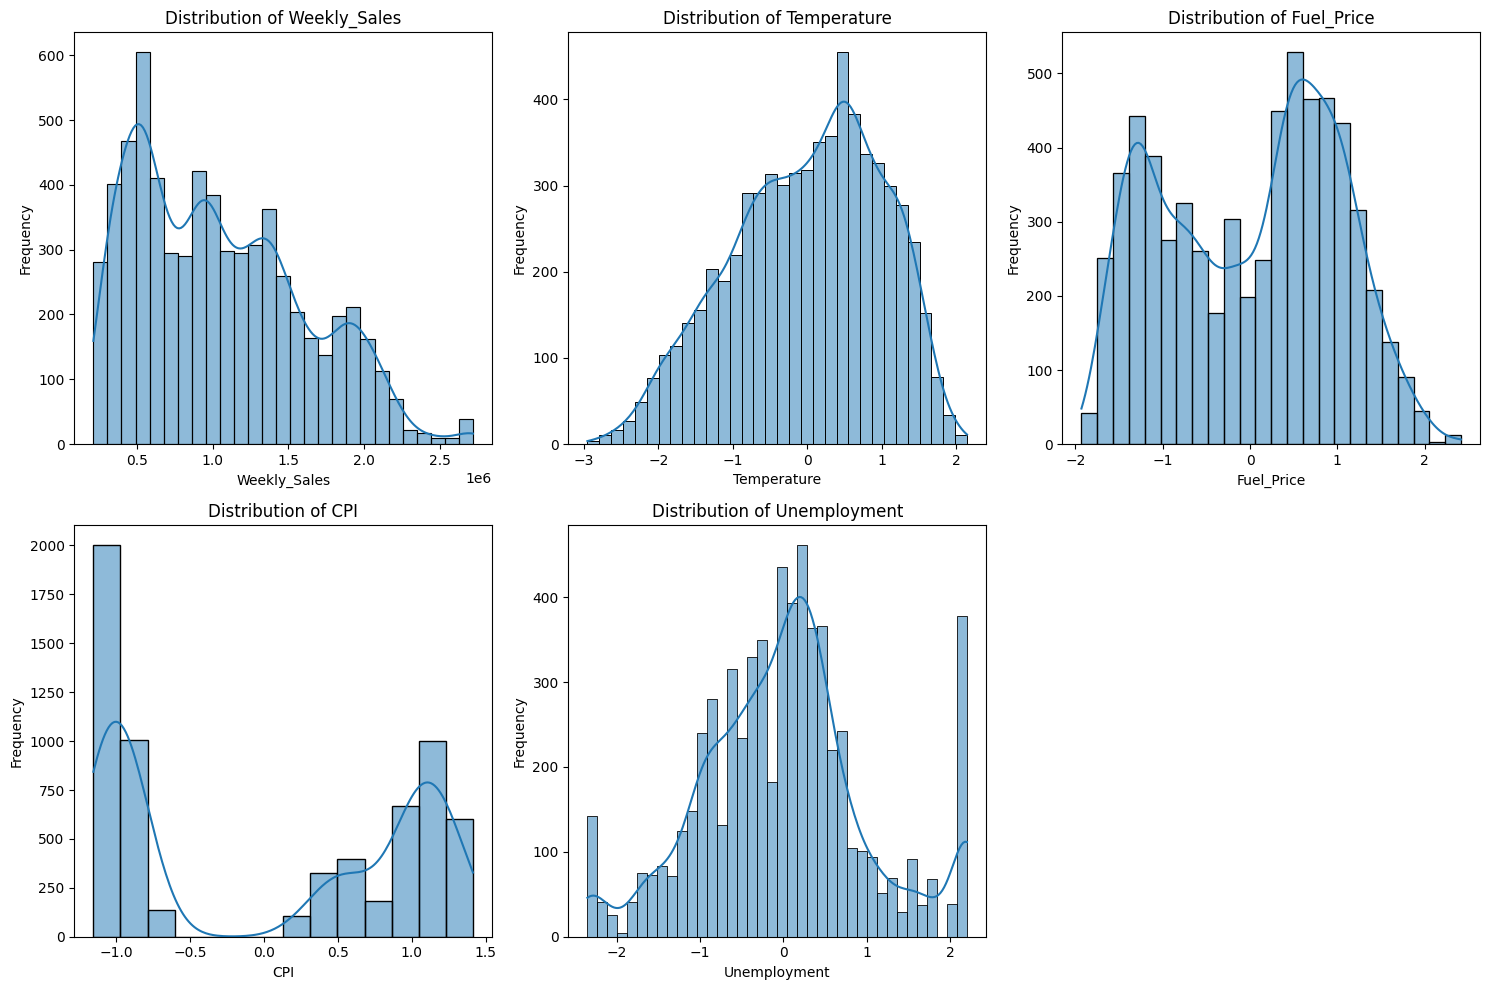

Histograms for numerical features displayed.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features_for_analysis = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_for_analysis):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.histplot(df_processed[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Histograms for numerical features displayed.")

**Reasoning**:
To visually identify the spread, central tendency, and any potential outliers for each numerical feature, I will create box plots for 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', and 'Unemployment'.



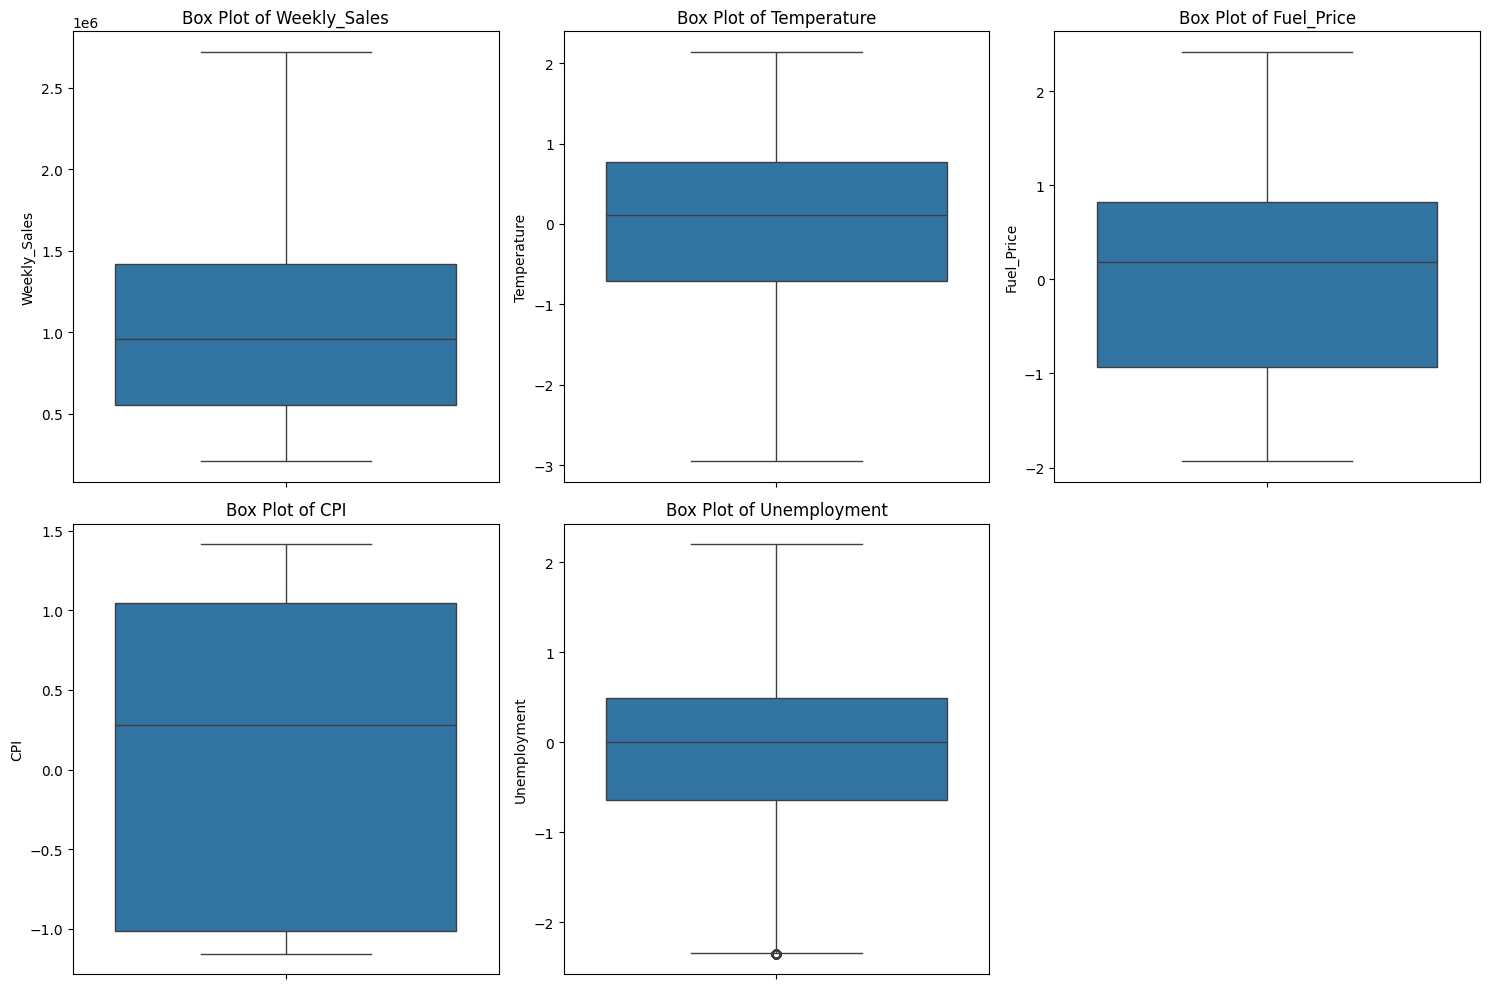

Box plots for numerical features displayed.


In [24]:
numerical_features_for_analysis = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_for_analysis):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_processed[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()
print("Box plots for numerical features displayed.")

## 4.2 Bivariate Analysis




**Reasoning**:
To examine the relationships between 'Weekly_Sales' and other numerical features, I will create scatter plots for 'Weekly_Sales' against 'Temperature', 'Fuel_Price', 'CPI', and 'Unemployment'. This will help visualize potential correlations.



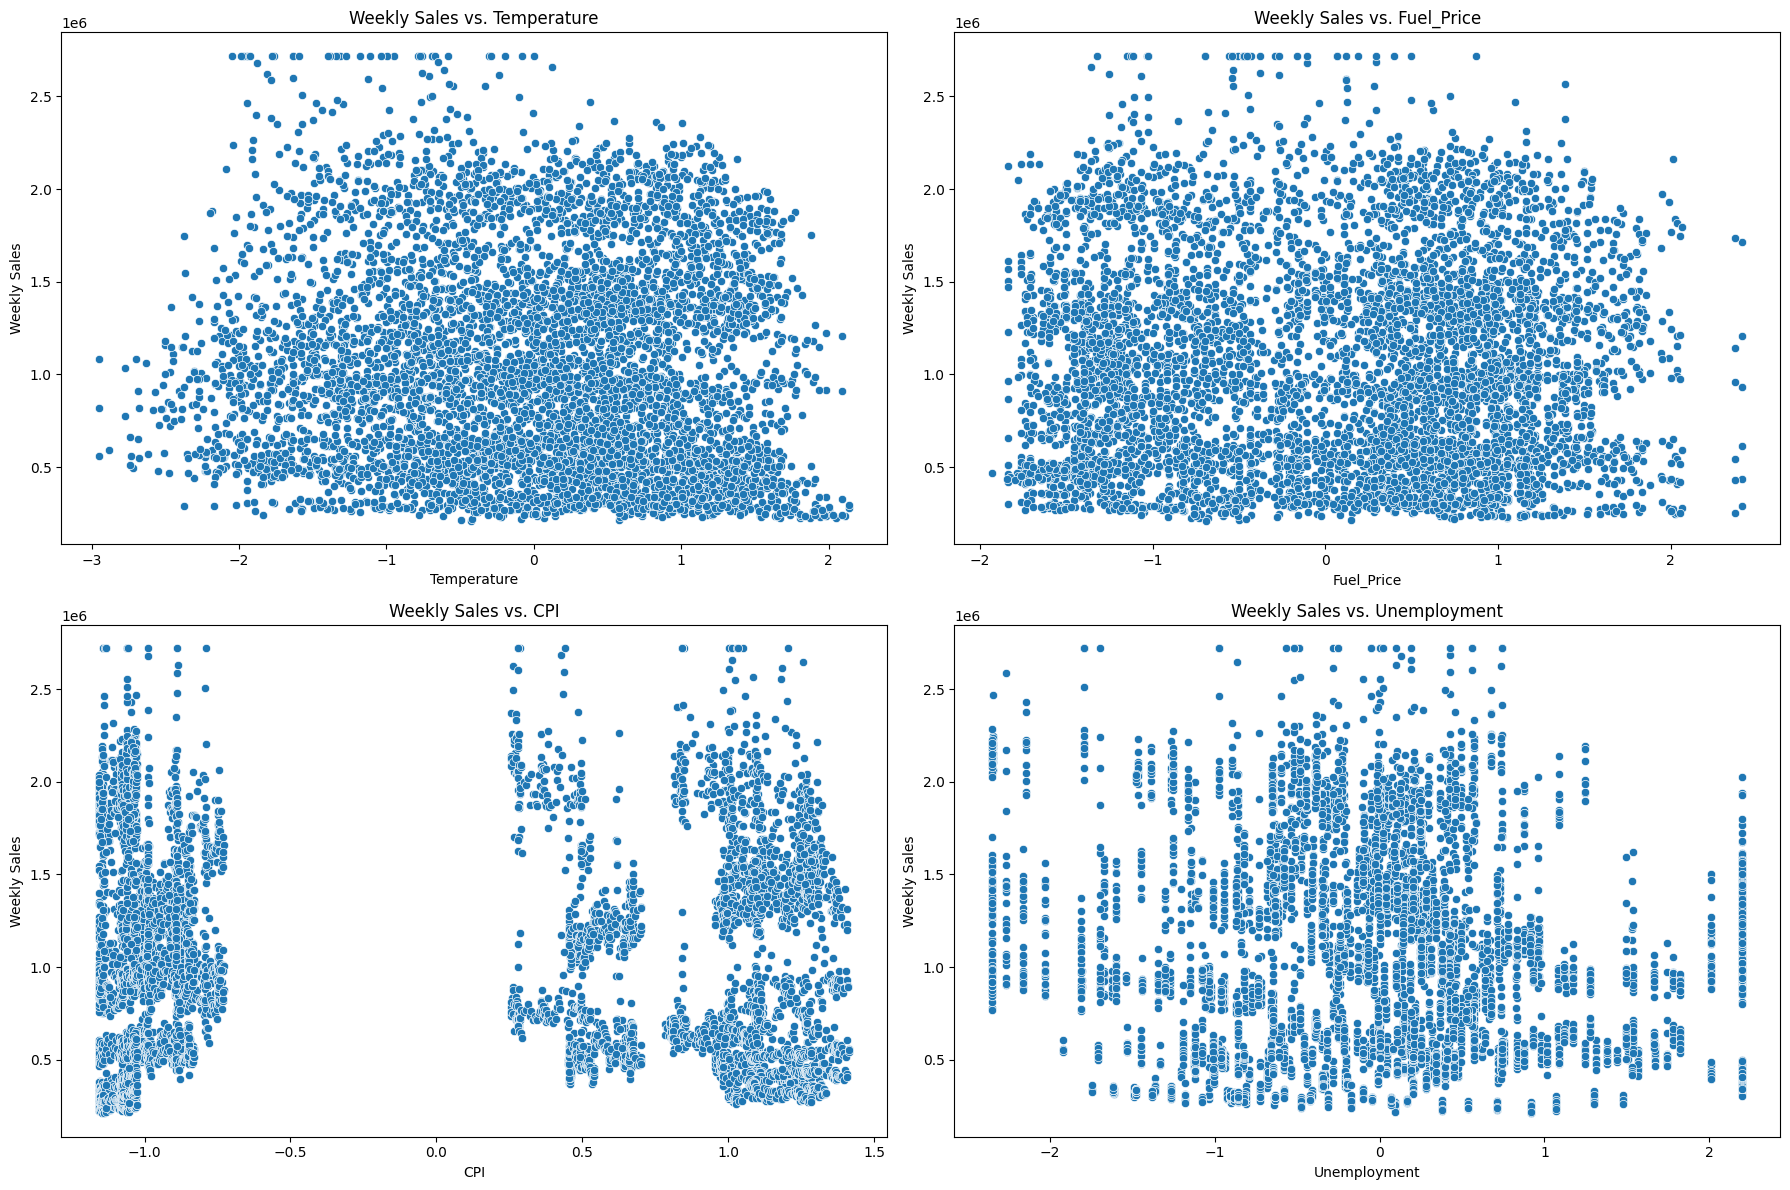

Scatter plots showing Weekly Sales vs. numerical features displayed.


In [25]:
numerical_features_for_scatter = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features_for_scatter):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.scatterplot(x=df_processed[col], y=df_processed['Weekly_Sales'])
    plt.title(f'Weekly Sales vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()
print("Scatter plots showing Weekly Sales vs. numerical features displayed.")

**Reasoning**:
To analyze the relationship between 'Weekly_Sales' and 'Holiday_Flag', I will create a bar chart showing the average weekly sales for both holiday and non-holiday weeks. This directly addresses the second instruction of the subtask.



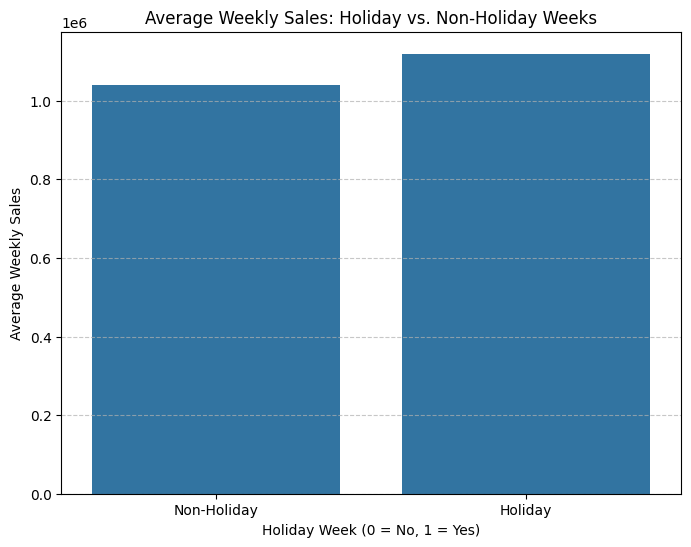

Bar chart showing average Weekly Sales for Holiday vs. Non-Holiday weeks displayed.


In [26]:
avg_sales_by_holiday = df_processed.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=avg_sales_by_holiday)
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Week (0 = No, 1 = Yes)')
plt.ylabel('Average Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Bar chart showing average Weekly Sales for Holiday vs. Non-Holiday weeks displayed.")

## 4.3 Multivariate Analysis and Feature Relationships



**Reasoning**:
To begin the multivariate analysis, I will calculate the correlation matrix for the specified numerical features ('Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment') from the `df_processed` DataFrame. This directly addresses the first instruction of the subtask.



In [27]:
numerical_features_for_corr = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation_matrix = df_processed[numerical_features_for_corr].corr()

print("Correlation Matrix for Numerical Features:")
print(correlation_matrix)

Correlation Matrix for Numerical Features:
              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.060808    0.010998 -0.072627     -0.108662
Temperature      -0.060808     1.000000    0.144962  0.176960      0.088315
Fuel_Price        0.010998     0.144962    1.000000 -0.170642     -0.053428
CPI              -0.072627     0.176960   -0.170642  1.000000     -0.278542
Unemployment     -0.108662     0.088315   -0.053428 -0.278542      1.000000


**Reasoning**:
To visually represent the correlation matrix and explore the interrelationships among numerical features, I will create a correlation heatmap using `seaborn.heatmap` with annotations, as per the instructions.



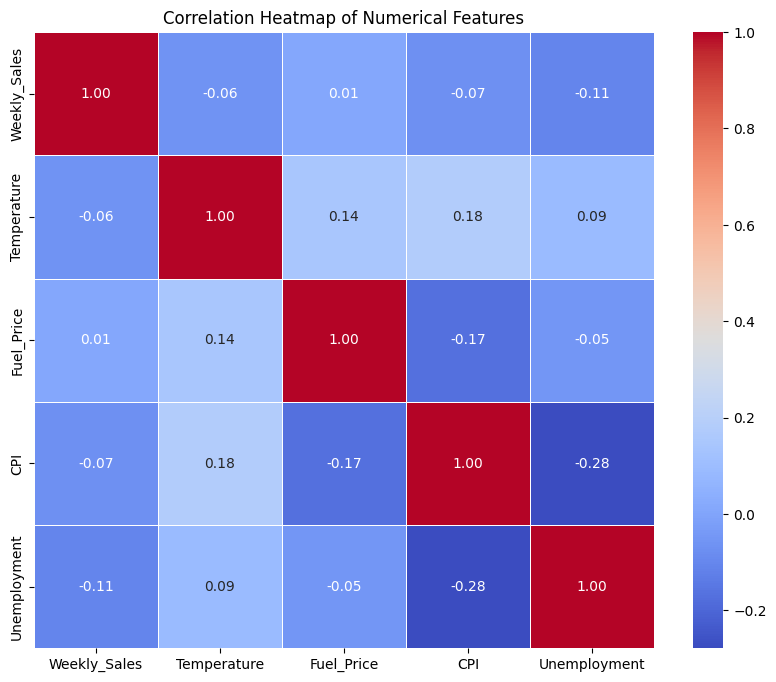

Correlation heatmap displayed.


In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
print("Correlation heatmap displayed.")

**Reasoning**:
To visualize the pairwise relationships and distributions of the selected numerical features, I will generate a pair plot using `seaborn.pairplot` as specified in the instructions. This will provide a comprehensive overview of how these features interact with each other and their individual distributions.



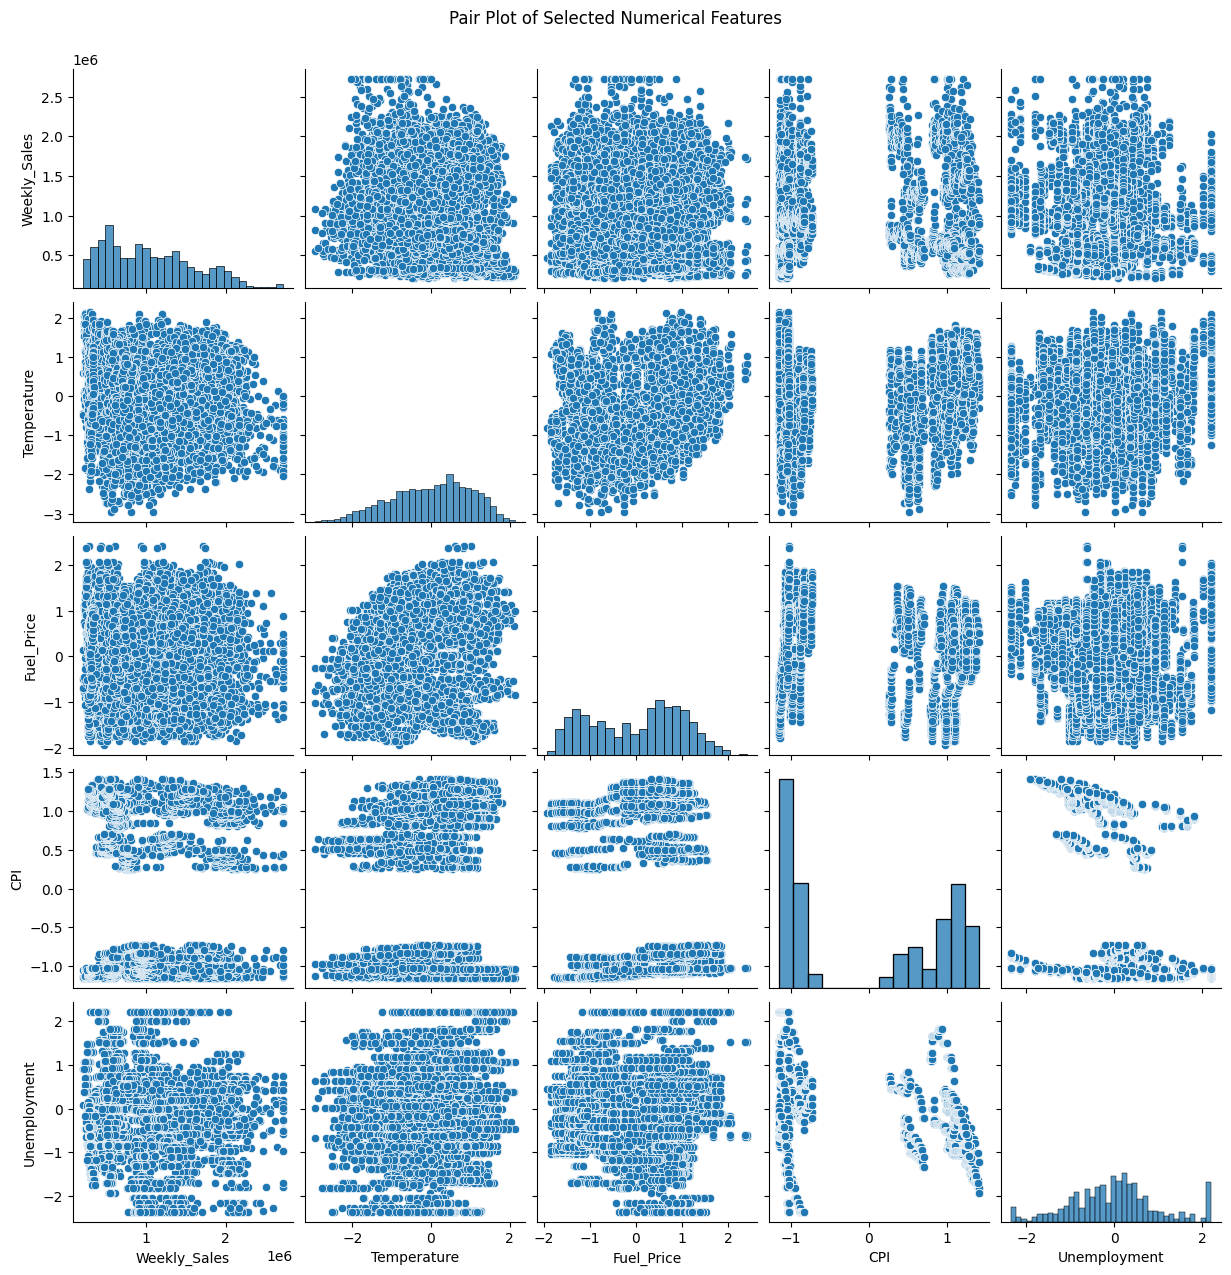

Pair plot for selected numerical features displayed.


In [29]:
selected_features_for_pairplot = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
sns.pairplot(df_processed[selected_features_for_pairplot])
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02) # Adjust suptitle position
plt.show()
print("Pair plot for selected numerical features displayed.")

## 4.4 Temporal Analysis



**Reasoning**:
As per the first instruction, I will extract 'Year', 'Month', and 'Week' from the 'Date' column in `df_processed` and store them in new columns. For 'Week', I will use `.dt.isocalendar().week` to get the ISO week number.



In [30]:
df_processed['Year'] = df_processed['Date'].dt.year
df_processed['Month'] = df_processed['Date'].dt.month
df_processed['Week'] = df_processed['Date'].dt.isocalendar().week.astype(int)

print("Extracted 'Year', 'Month', and 'Week' columns successfully.")
print("Displaying the head of df_processed with new temporal features:")
print(df_processed[['Date', 'Year', 'Month', 'Week', 'Weekly_Sales']].head())

Extracted 'Year', 'Month', and 'Week' columns successfully.
Displaying the head of df_processed with new temporal features:
        Date  Year  Month  Week  Weekly_Sales
0 2010-02-05  2010      2     5    1643690.90
1 2010-02-12  2010      2     6    1641957.44
2 2010-02-19  2010      2     7    1611968.17
3 2010-02-26  2010      2     8    1409727.59
4 2010-03-05  2010      3     9    1554806.68


**Reasoning**:
To observe overall trends and seasonality across all stores combined, I will create a line plot showing the sum of `Weekly_Sales` against the 'Date' column. This addresses the second instruction of the subtask.



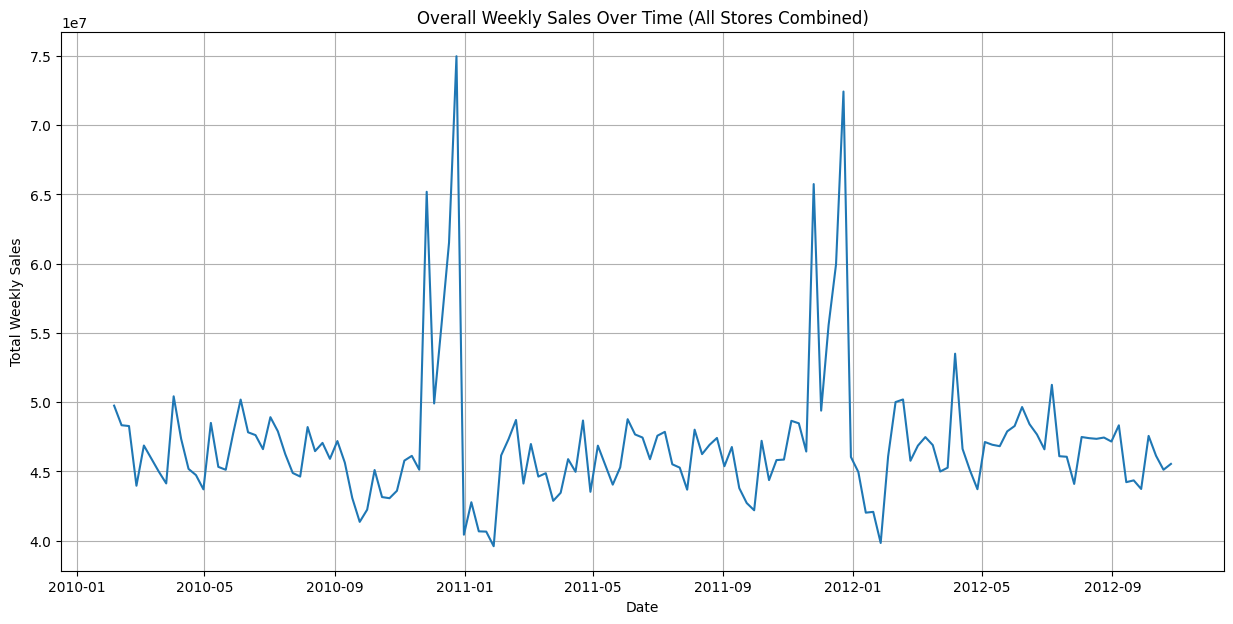

Line plot showing overall Weekly Sales over time displayed.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Date and sum Weekly_Sales to get overall sales across all stores
total_weekly_sales = df_processed.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='Date', y='Weekly_Sales', data=total_weekly_sales)
plt.title('Overall Weekly Sales Over Time (All Stores Combined)')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()
print("Line plot showing overall Weekly Sales over time displayed.")

**Reasoning**:
To visualize the average weekly sales by year, month, and week of the year as per the instructions, I will group the data by each temporal feature, calculate the mean of 'Weekly_Sales', and then create appropriate bar and line plots to display these trends.



/tmp/ipython-input-1035/3569416011.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Weekly_Sales', data=avg_sales_by_year, palette='viridis')
/tmp/ipython-input-1035/3569416011.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Weekly_Sales', data=avg_sales_by_month, palette='magma')


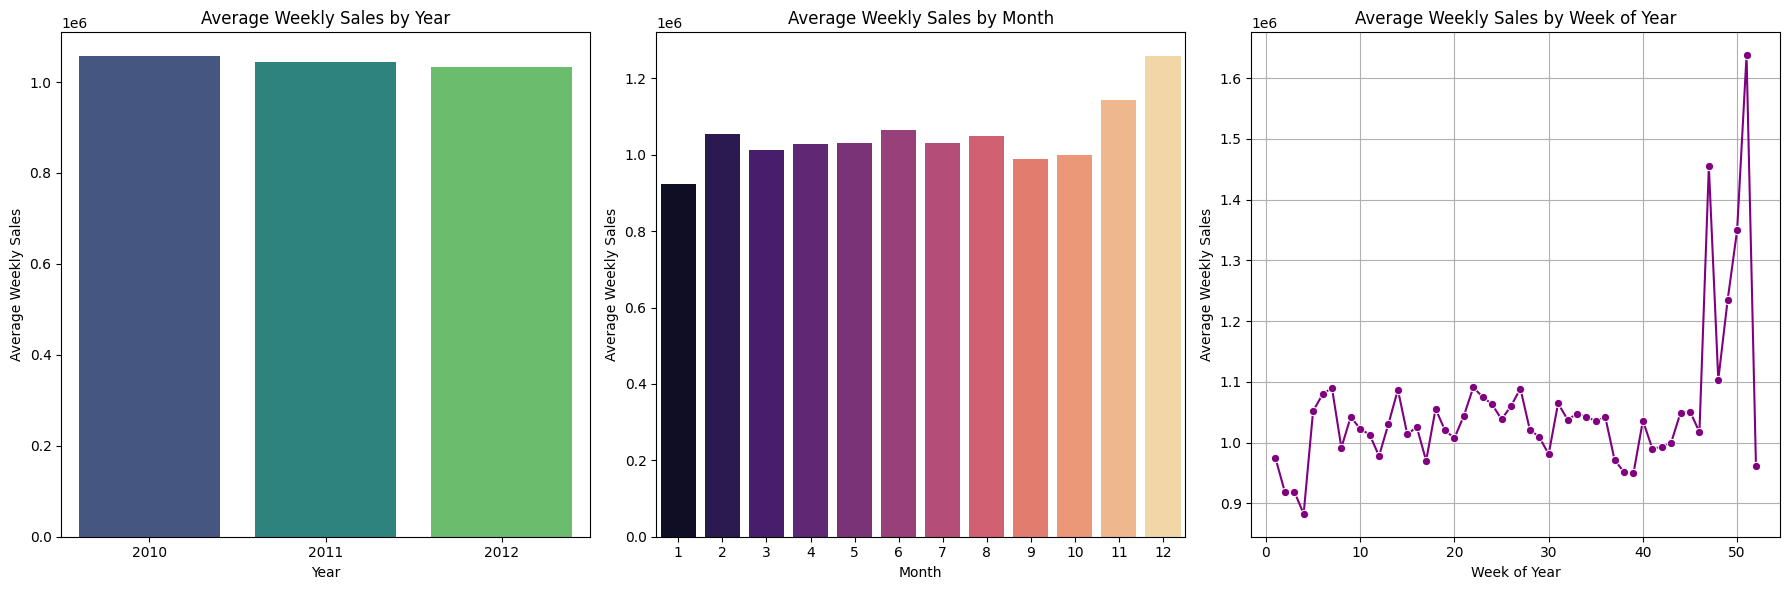

Plots for average Weekly Sales by Year, Month, and Week of Year displayed.


In [32]:
plt.figure(figsize=(18, 6))

# Average Weekly Sales by Year
plt.subplot(1, 3, 1)
avg_sales_by_year = df_processed.groupby('Year')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Year', y='Weekly_Sales', data=avg_sales_by_year, palette='viridis')
plt.title('Average Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')

# Average Weekly Sales by Month
plt.subplot(1, 3, 2)
avg_sales_by_month = df_processed.groupby('Month')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Month', y='Weekly_Sales', data=avg_sales_by_month, palette='magma')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')

# Average Weekly Sales by Week of Year
plt.subplot(1, 3, 3)
avg_sales_by_week = df_processed.groupby('Week')['Weekly_Sales'].mean().reset_index()
sns.lineplot(x='Week', y='Weekly_Sales', data=avg_sales_by_week, marker='o', color='purple')
plt.title('Average Weekly Sales by Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Average Weekly Sales')
plt.grid(True)

plt.tight_layout()
plt.show()
print("Plots for average Weekly Sales by Year, Month, and Week of Year displayed.")

**Reasoning**:
The previous code generated a FutureWarning because `palette` was used without a `hue` argument in `sns.barplot`. To resolve this and ensure future compatibility, I will update the `barplot` calls for 'Year' and 'Month' by explicitly setting the `hue` argument to the x-axis variable and `legend=False`.



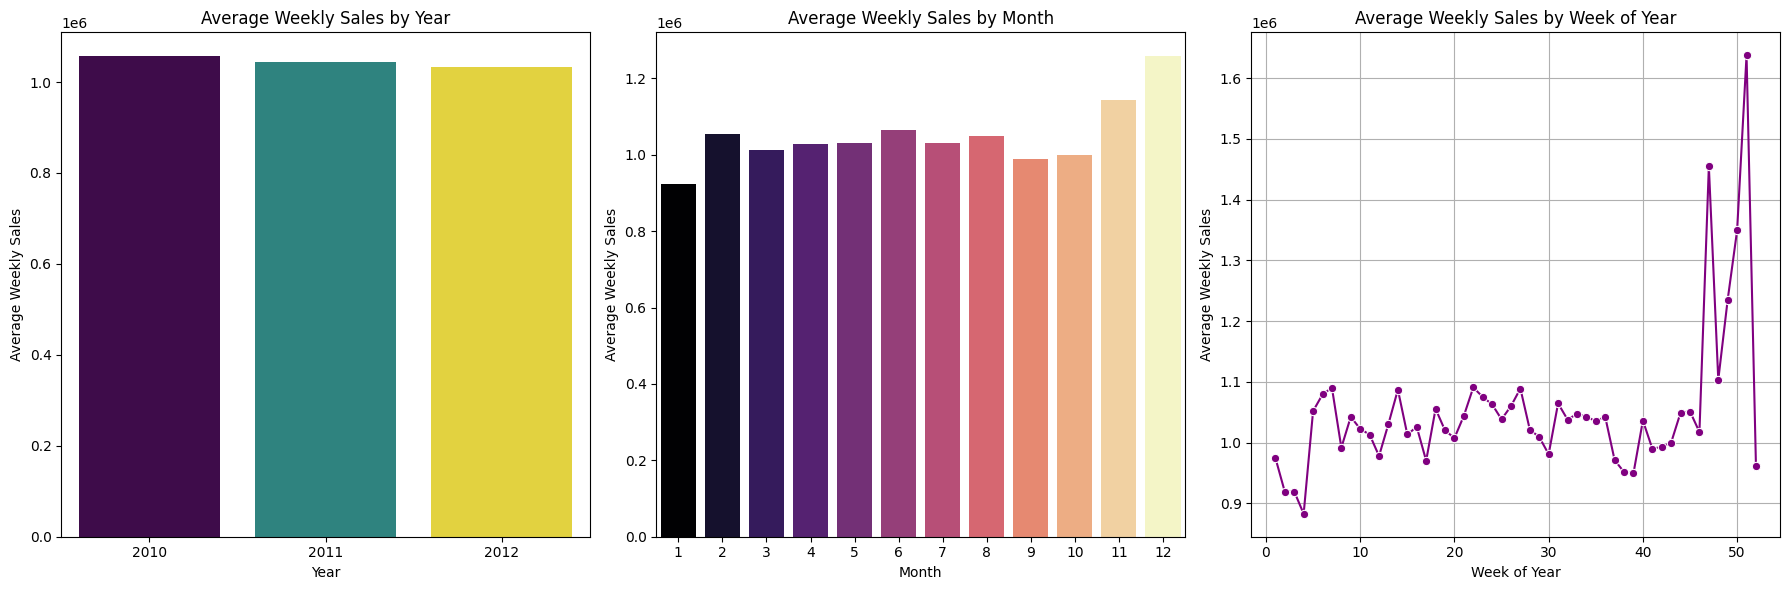

Plots for average Weekly Sales by Year, Month, and Week of Year displayed.


In [33]:
plt.figure(figsize=(18, 6))

# Average Weekly Sales by Year
plt.subplot(1, 3, 1)
avg_sales_by_year = df_processed.groupby('Year')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Year', y='Weekly_Sales', data=avg_sales_by_year, hue='Year', palette='viridis', legend=False)
plt.title('Average Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')

# Average Weekly Sales by Month
plt.subplot(1, 3, 2)
avg_sales_by_month = df_processed.groupby('Month')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Month', y='Weekly_Sales', data=avg_sales_by_month, hue='Month', palette='magma', legend=False)
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')

# Average Weekly Sales by Week of Year
plt.subplot(1, 3, 3)
avg_sales_by_week = df_processed.groupby('Week')['Weekly_Sales'].mean().reset_index()
sns.lineplot(x='Week', y='Weekly_Sales', data=avg_sales_by_week, marker='o', color='purple')
plt.title('Average Weekly Sales by Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Average Weekly Sales')
plt.grid(True)

plt.tight_layout()
plt.show()
print("Plots for average Weekly Sales by Year, Month, and Week of Year displayed.")

**Reasoning**:
To visualize individual store temporal patterns, I will select three distinct stores (Store 1, Store 2, Store 3) and create separate line plots for each, showing their `Weekly_Sales` against 'Date'. This addresses the final instruction of the subtask.



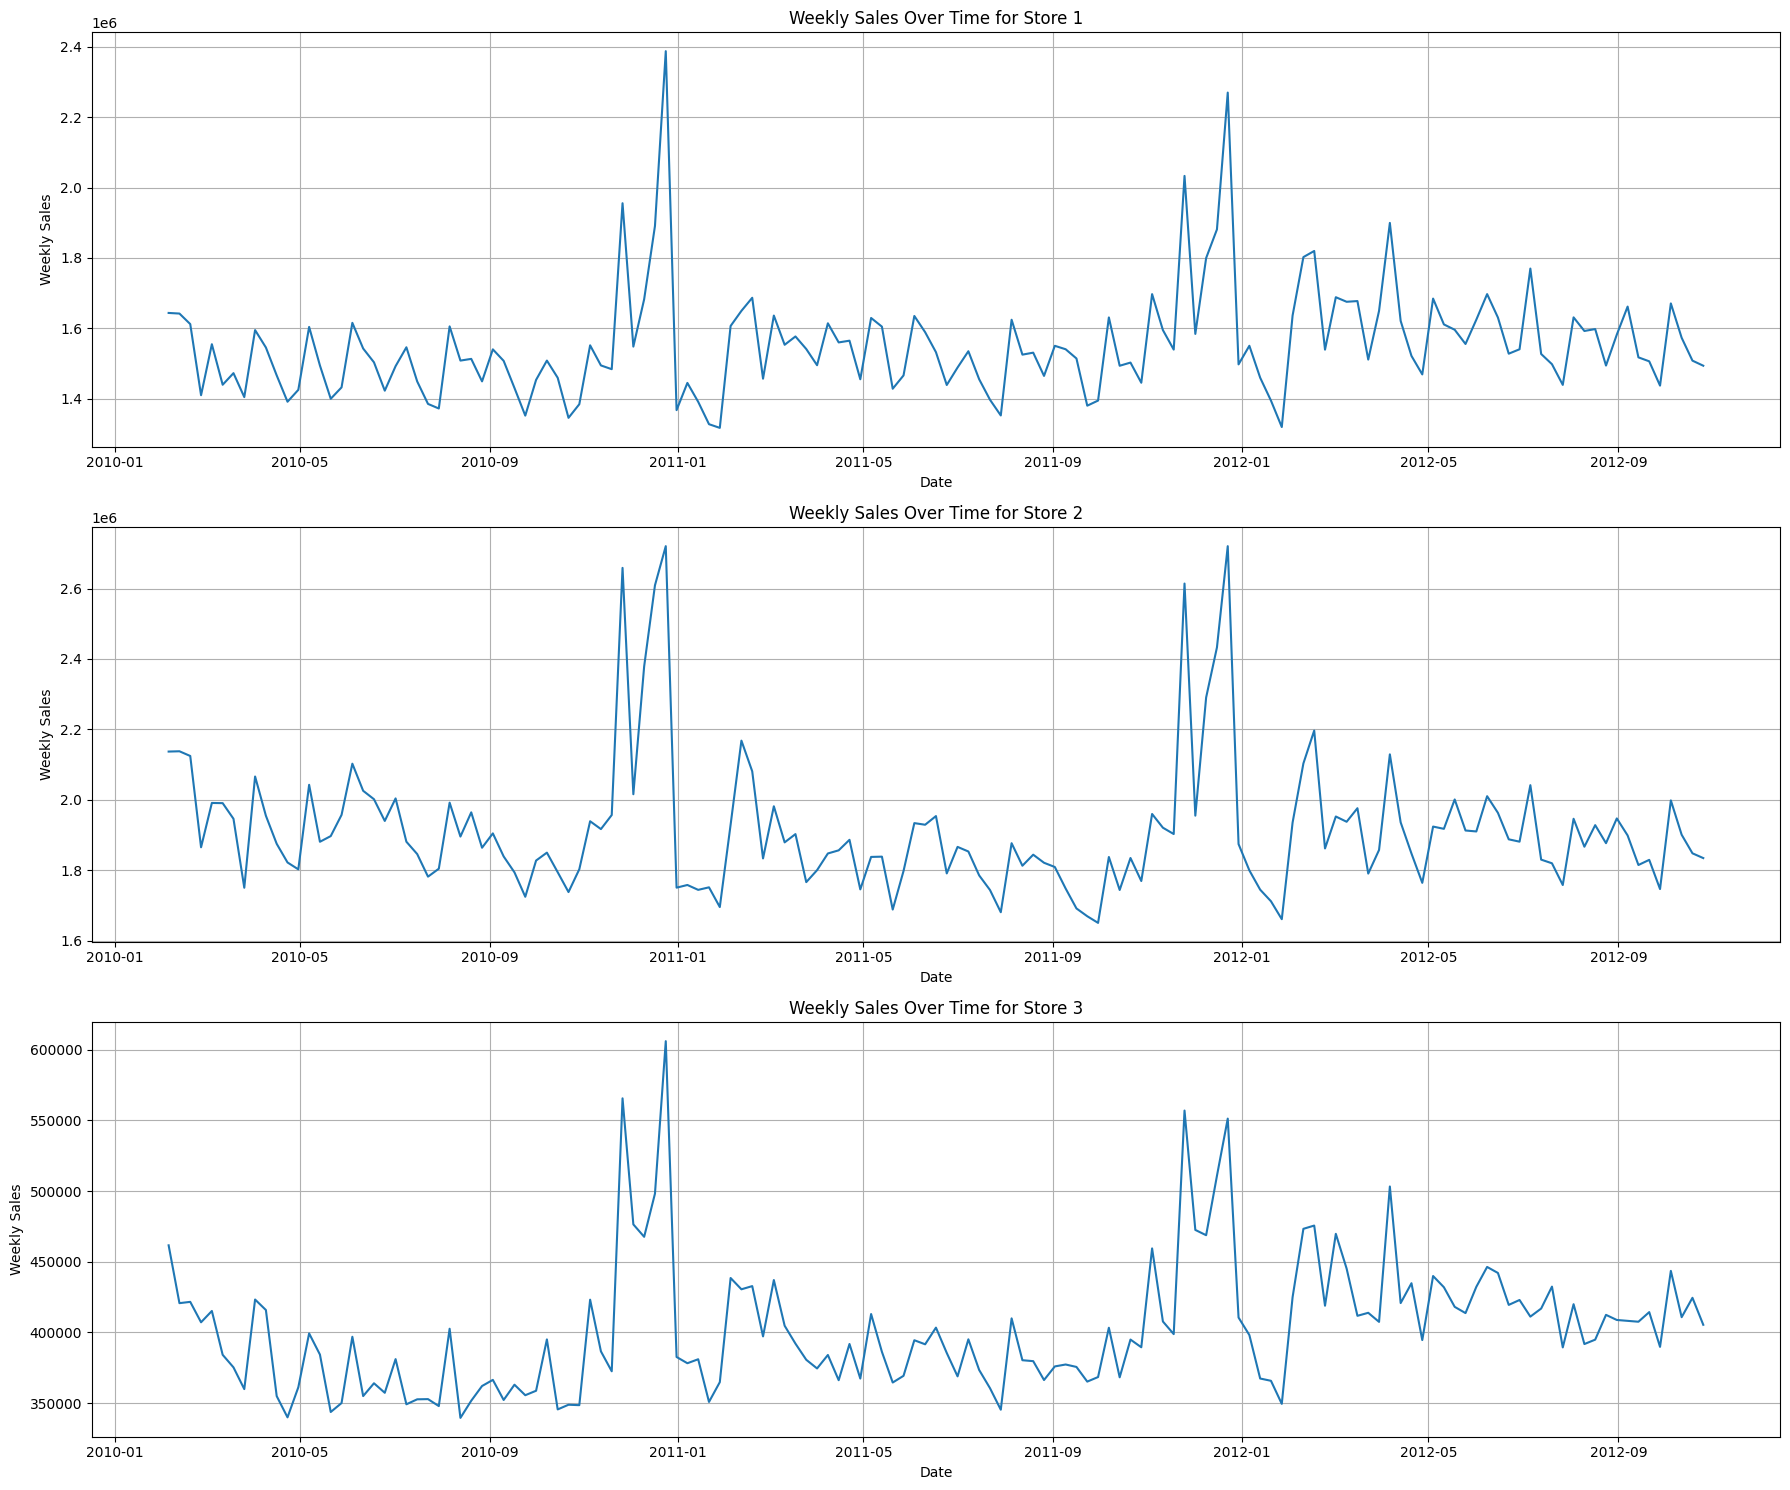

Line plots for Weekly Sales over time for selected individual stores displayed.


In [34]:
selected_stores = [1, 2, 3]

plt.figure(figsize=(18, 5 * len(selected_stores)))

for i, store_id in enumerate(selected_stores):
    # Filter data for the specific store
    # The 'Store_X' columns are one-hot encoded, so we check if the 'Store_X' column is 1
    store_col_name = f'Store_{store_id}'
    df_store = df_processed[df_processed[store_col_name] == 1].copy()

    plt.subplot(len(selected_stores), 1, i + 1)
    sns.lineplot(x='Date', y='Weekly_Sales', data=df_store)
    plt.title(f'Weekly Sales Over Time for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.grid(True)

plt.tight_layout()
plt.show()
print("Line plots for Weekly Sales over time for selected individual stores displayed.")

## 4.5 Categorical Data Analysis (Holiday_Flag)




**Reasoning**:
To start the analysis of sales distribution during holiday and non-holiday periods, I will first print the mean `Weekly_Sales` for both holiday (1) and non-holiday (0) weeks. This provides a numerical context before visualizing the distributions.



In [35]:
print("Average Weekly Sales for Holiday vs. Non-Holiday weeks:")
avg_sales_by_holiday = df_processed.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
print(avg_sales_by_holiday)

Average Weekly Sales for Holiday vs. Non-Holiday weeks:
   Holiday_Flag  Weekly_Sales
0             0  1.039421e+06
1             1  1.119619e+06


**Reasoning**:
To visualize the distribution of `Weekly_Sales` for both holiday and non-holiday periods, including density and spread, I will create a violin plot as instructed. This will fulfill the visualization requirements of the subtask.



/tmp/ipython-input-1035/1196918125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Holiday_Flag', y='Weekly_Sales', data=df_processed, palette='coolwarm')


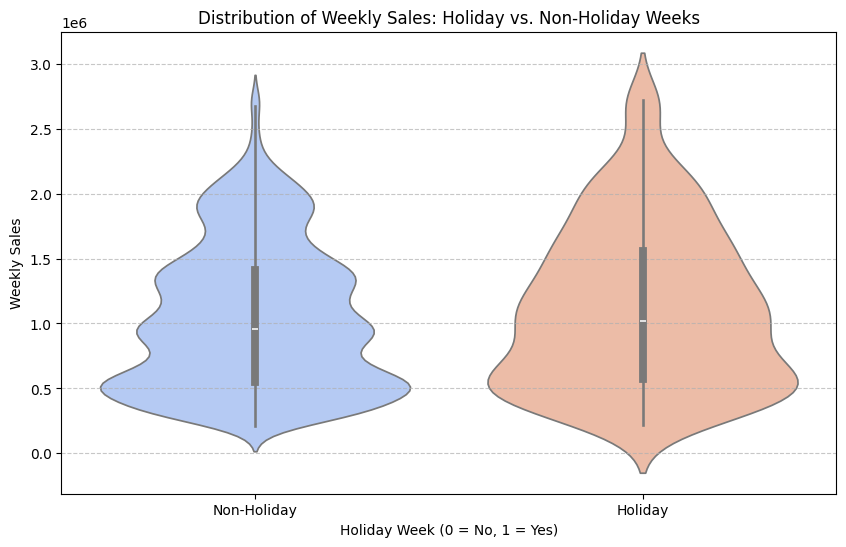

Violin plot showing the distribution of Weekly Sales for Holiday vs. Non-Holiday weeks displayed.


In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Holiday_Flag', y='Weekly_Sales', data=df_processed, palette='coolwarm')
plt.title('Distribution of Weekly Sales: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Week (0 = No, 1 = Yes)')
plt.ylabel('Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Violin plot showing the distribution of Weekly Sales for Holiday vs. Non-Holiday weeks displayed.")

**Reasoning**:
The previous `violinplot` call generated a `FutureWarning` due to `palette` being used without a `hue` argument. To resolve this and ensure future compatibility, I will explicitly set `hue='Holiday_Flag'` and `legend=False` in the `sns.violinplot` call.



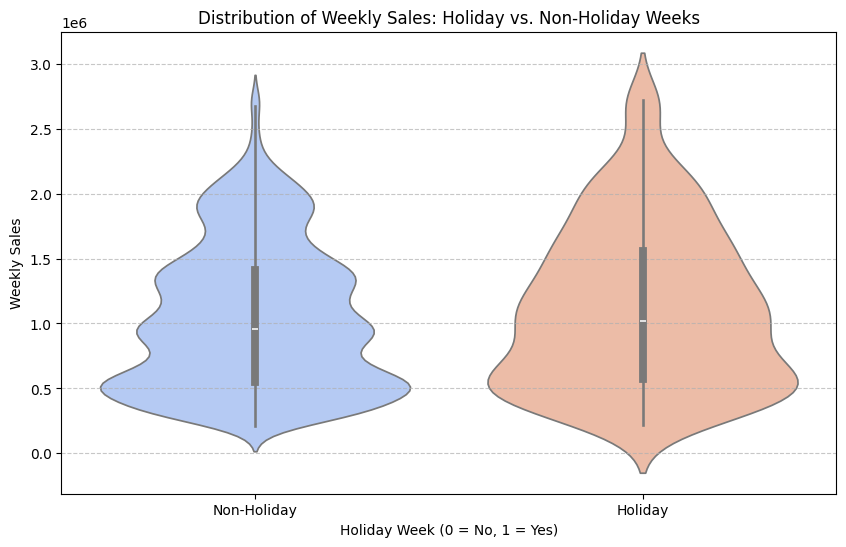

Violin plot showing the distribution of Weekly Sales for Holiday vs. Non-Holiday weeks displayed.


In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Holiday_Flag', y='Weekly_Sales', data=df_processed, hue='Holiday_Flag', palette='coolwarm', legend=False)
plt.title('Distribution of Weekly Sales: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Week (0 = No, 1 = Yes)')
plt.ylabel('Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Violin plot showing the distribution of Weekly Sales for Holiday vs. Non-Holiday weeks displayed.")

## 4.6 Dimensionality Reduction Visualization (PCA)




**Reasoning**:
First, I will import the `PCA` class from `sklearn.decomposition` as instructed. This is a prerequisite for performing Principal Component Analysis.



In [38]:
from sklearn.decomposition import PCA

print("PCA class imported successfully.")

PCA class imported successfully.


**Reasoning**:
Now that PCA is imported, I will define the features for PCA by selecting all numerical features and the one-hot encoded 'Store' columns, excluding 'Weekly_Sales' and the temporal features ('Date', 'Year', 'Month', 'Week'), then instantiate a PCA object with `n_components=2`, fit it to the selected features, and transform the data to obtain the principal components. This directly addresses instructions 2, 3, and 4 of the subtask.



In [39]:
features_for_pca = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
store_cols = [col for col in df_processed.columns if col.startswith('Store_')]
features_for_pca.extend(store_cols)

X_pca = df_processed[features_for_pca]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_pca)

df_pca = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

print("Principal Component Analysis performed. Displaying the head of the DataFrame with the first two principal components:")
print(df_pca.head())

Principal Component Analysis performed. Displaying the head of the DataFrame with the first two principal components:
   principal_component_1  principal_component_2
0               0.953070              -1.695627
1               0.939507              -1.887969
2               0.969221              -1.872723
3               0.996115              -1.526607
4               0.961861              -1.447271


**Reasoning**:
To visualize the PCA results and identify any clusters or patterns, I will create a scatter plot of the first principal component against the second principal component using `seaborn.scatterplot`. I will also add a title and axis labels to the plot as instructed.



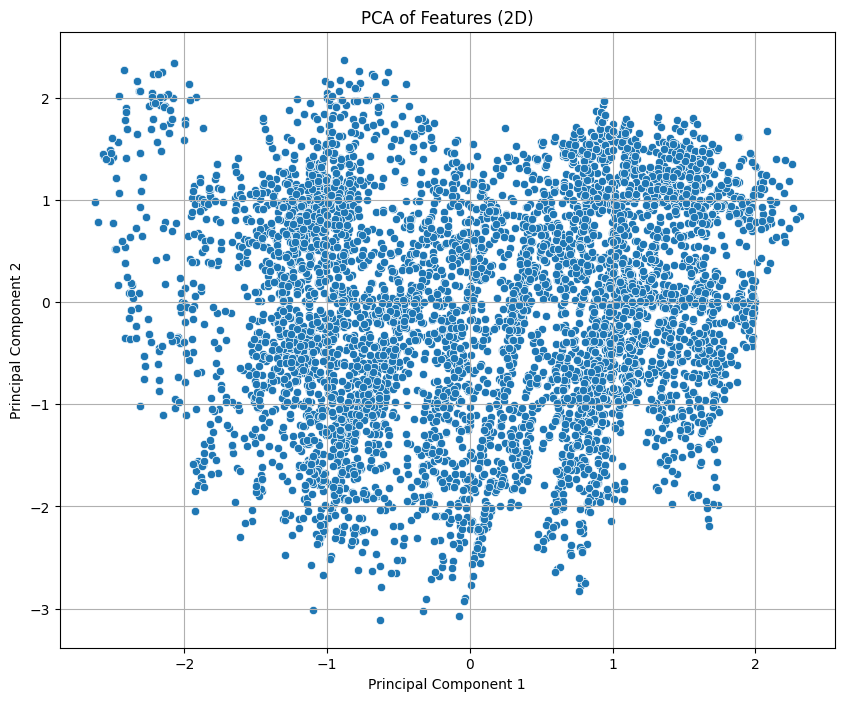

Scatter plot of the first two principal components displayed.


In [40]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', data=df_pca)
plt.title('PCA of Features (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
print("Scatter plot of the first two principal components displayed.")

## 4.7 Statistical and Hypothesis Tests (T-test)




**Reasoning**:
First, I will import the `ttest_ind` function from `scipy.stats` as instructed, which is necessary to perform the independent samples t-test.



In [41]:
from scipy.stats import ttest_ind

print("Imported ttest_ind from scipy.stats successfully.")

Imported ttest_ind from scipy.stats successfully.


**Reasoning**:
Now that `ttest_ind` is imported, I will separate the `Weekly_Sales` data into two groups based on the `Holiday_Flag` (1 for holiday weeks, 0 for non-holiday weeks) as instructed.



In [42]:
holiday_sales = df_processed[df_processed['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df_processed[df_processed['Holiday_Flag'] == 0]['Weekly_Sales']

print(f"Number of holiday sales records: {len(holiday_sales)}")
print(f"Number of non-holiday sales records: {len(non_holiday_sales)}")

Number of holiday sales records: 450
Number of non-holiday sales records: 5985


**Reasoning**:
Now that the data is separated, I will perform the independent samples t-test using `ttest_ind` on the `holiday_sales` and `non_holiday_sales` groups, and then print the calculated t-statistic and p-value, as instructed.



In [43]:
t_statistic, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False) # Assuming unequal variances based on distributions

print(f"\nT-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 2.6707
P-value: 0.0078


### Interpretation of T-test Results

The independent samples t-test was conducted to compare the mean `Weekly_Sales` between holiday and non-holiday weeks.

*   **T-statistic**: `2.6707`
*   **P-value**: `0.0078`

**Conclusion:**

With a p-value of `0.0078`, which is less than the common significance level of `0.05`, we can **reject the null hypothesis**.

This indicates that there is a **statistically significant difference** in `Weekly_Sales` between holiday and non-holiday weeks. In simpler terms, holiday weeks tend to have significantly different sales figures compared to non-holiday weeks. The descriptive statistics earlier (average sales of ~1.12 million for holidays vs ~1.04 million for non-holidays) suggested higher sales during holiday weeks, and this t-test confirms that this observed difference is statistically significant and not due to random chance.

### Interpretation of T-test Results

The independent samples t-test was conducted to compare the mean `Weekly_Sales` between holiday and non-holiday weeks.

*   **T-statistic**: `2.6707`
*   **P-value**: `0.0078`

**Conclusion:**

With a p-value of `0.0078`, which is less than the common significance level of `0.05`, we can **reject the null hypothesis**.

This indicates that there is a **statistically significant difference** in `Weekly_Sales` between holiday and non-holiday weeks. In simpler terms, holiday weeks tend to have significantly different sales figures compared to non-holiday weeks. The descriptive statistics earlier (average sales of ~1.12 million for holidays vs ~1.04 million for non-holidays) suggested higher sales during holiday weeks, and this t-test confirms that this observed difference is statistically significant and not due to random chance.

### 4.8 Complex Data Type Visualization

#### Explanation:
Complex data type visualizations typically involve data such as images, videos, audio, or extensive unstructured text. The current Walmart weekly sales dataset, however, consists entirely of structured numerical data (`Weekly_Sales`, `Temperature`, `Fuel_Price`, `CPI`, `Unemployment`), categorical data (`Holiday_Flag`, `Store` IDs), and date/time data (`Date`). There are no complex data types present that would necessitate specialized visualization techniques like embedding visualizations for text clusters, image feature maps, or audio spectrograms. Therefore, this section is not applicable to the current project's dataset.


### 4.9 Geospatial Analysis

#### Explanation:
Geospatial analysis involves examining data related to geographical locations to identify patterns, relationships, and trends in spatial contexts. This typically requires precise geographical coordinates (latitude and longitude), regional boundaries, or other detailed location-based information. Our dataset only contains a `Store` ID, which identifies individual stores but lacks any explicit geographical coordinates or detailed location information (e.g., city, state, postal code). While stores are geographically distinct entities, without the actual spatial data, performing meaningful geospatial analysis (such as mapping sales densities, analyzing sales by region, or proximity effects) is not possible within the scope of this dataset. Therefore, this section is not applicable.


### 4.10 Segmentation Analysis

#### Explanation:
Segmentation analysis, in the context of data analysis and machine learning, involves dividing a heterogeneous dataset into more homogeneous subgroups (segments) based on shared characteristics or behaviors. For a retail business like Walmart, this could involve customer segmentation (based on purchasing patterns) or store segmentation (based on sales performance, demographics, or operational characteristics).

While segmentation is a powerful tool for understanding nuances in data and can be highly relevant for targeted strategies (e.g., applying different forecasting models to different store segments, or tailoring promotions to specific customer segments), it is typically a more advanced analytical step that follows foundational Exploratory Data Analysis (EDA) and feature engineering. In the current phase, the focus is on a holistic understanding of the dataset's overall characteristics, relationships, and temporal patterns that influence weekly sales across all stores. Implementing a full-fledged segmentation analysis with direct code would:

1.  **Exceed the scope of basic EDA**: It involves clustering algorithms, detailed profile generation for each segment, and often a deeper dive into domain-specific interpretations, which are more aligned with advanced modeling or business strategy phases.
2.  **Require prior foundational understanding**: Effective segmentation often builds upon insights gained from initial EDA and relies on well-engineered features, some of which are still being prepared in this notebook.

Therefore, while conceptually relevant as a potential future step for more nuanced modeling or business insights, a direct code implementation of segmentation analysis is deferred and not considered a core requirement for this initial EDA phase.

## 5.1 Time-Based Data Splitting



**Reasoning**:
First, I need to sort the `df_processed` DataFrame by the 'Date' column to ensure all data is in chronological order before performing a time-based split. This is a critical step for time series analysis to prevent data leakage.



In [44]:
df_processed = df_processed.sort_values(by='Date').reset_index(drop=True)
print("df_processed sorted by 'Date' column successfully.")
print("Displaying head and tail to confirm sorting:")
print(df_processed[['Date', 'Weekly_Sales']].head())
print(df_processed[['Date', 'Weekly_Sales']].tail())

df_processed sorted by 'Date' column successfully.
Displaying head and tail to confirm sorting:
        Date  Weekly_Sales
0 2010-02-05    1643690.90
1 2010-02-05    2193048.75
2 2010-02-05     536006.73
3 2010-02-05     789036.02
4 2010-02-05     465108.52
           Date  Weekly_Sales
6430 2012-10-26     688940.94
6431 2012-10-26     319550.77
6432 2012-10-26     921264.52
6433 2012-10-26    1127516.25
6434 2012-10-26     760281.43


**Reasoning**:
Now that the `df_processed` DataFrame is sorted by date, I will determine the split points for training, validation, and test sets (70%, 15%, 15% respectively) based on the total number of rows. Then, I will create three new DataFrames (`df_train`, `df_val`, `df_test`) based on these indices and print their head, tail, and number of rows to confirm the split.



In [45]:
total_rows = len(df_processed)
train_size = int(total_rows * 0.7)
val_size = int(total_rows * 0.15)
test_size = total_rows - train_size - val_size

df_train = df_processed.iloc[:train_size].copy()
df_val = df_processed.iloc[train_size:train_size + val_size].copy()
df_test = df_processed.iloc[train_size + val_size:].copy()

print(f"Training set: {len(df_train)} rows")
print(f"  Start Date: {df_train['Date'].min()}, End Date: {df_train['Date'].max()}")
print(f"Validation set: {len(df_val)} rows")
print(f"  Start Date: {df_val['Date'].min()}, End Date: {df_val['Date'].max()}")
print(f"Test set: {len(df_test)} rows")
print(f"  Start Date: {df_test['Date'].min()}, End Date: {df_test['Date'].max()}")

Training set: 4504 rows
  Start Date: 2010-02-05 00:00:00, End Date: 2012-01-06 00:00:00
Validation set: 965 rows
  Start Date: 2012-01-06 00:00:00, End Date: 2012-06-01 00:00:00
Test set: 966 rows
  Start Date: 2012-06-01 00:00:00, End Date: 2012-10-26 00:00:00


## Recap df_processed State




**Reasoning**:
To recap the current state of the preprocessed DataFrame, I will display its information using `df_processed.info()` to check data types and non-null counts, and then show its first five rows using `df_processed.head()` to review the structure and values, as per the instructions.



In [46]:
print("DataFrame Info (Data Types and Non-Null Counts):")
df_processed.info()

print("\nFirst 5 rows of the preprocessed DataFrame:")
df_processed.head()

DataFrame Info (Data Types and Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6435 non-null   datetime64[ns]
 1   Weekly_Sales  6435 non-null   float64       
 2   Holiday_Flag  6435 non-null   int64         
 3   Temperature   6435 non-null   float64       
 4   Fuel_Price    6435 non-null   float64       
 5   CPI           6435 non-null   float64       
 6   Unemployment  6435 non-null   float64       
 7   Store_1       6435 non-null   int64         
 8   Store_2       6435 non-null   int64         
 9   Store_3       6435 non-null   int64         
 10  Store_4       6435 non-null   int64         
 11  Store_5       6435 non-null   int64         
 12  Store_6       6435 non-null   int64         
 13  Store_7       6435 non-null   int64         
 14  Store_8       6435 non-null   int64    

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,...,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Year,Month,Week
0,2010-02-05,1643690.90,0,-0.995450,-1.713800,1.004175,0.154410,1,0,0,...,0,0,0,0,0,0,0,2010,2,5
1,2010-02-05,2193048.75,0,-0.343031,-0.864097,-1.146941,1.245444,0,0,0,...,0,0,0,0,0,0,0,2010,2,5
2,2010-02-05,536006.73,0,-0.796959,-1.713800,0.972580,0.449035,0,0,0,...,0,0,0,0,0,0,0,2010,2,5
3,2010-02-05,789036.02,0,-2.036717,-1.509000,-1.146941,-0.870202,0,0,0,...,0,0,0,0,0,0,0,2010,2,5
4,2010-02-05,465108.52,0,-1.172249,-1.713800,0.995440,0.297776,0,0,0,...,0,0,0,0,0,0,0,2010,2,5


## 5.2 Select and Initialize Algorithms



**Reasoning**:
To begin selecting and initializing the models, I will import `RandomForestRegressor` from `sklearn.ensemble` and `XGBoostRegressor` from `xgboost` as instructed.



In [47]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

print("RandomForestRegressor and XGBoostRegressor imported successfully.")

RandomForestRegressor and XGBoostRegressor imported successfully.


**Reasoning**:
Now that the necessary libraries are imported, I will instantiate `RandomForestRegressor` and `XGBoostRegressor` with their default parameters, assigning them to `rf_model` and `xgb_model` respectively, as instructed.



In [48]:
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

print("RandomForestRegressor and XGBoostRegressor initialized with default parameters.")

RandomForestRegressor and XGBoostRegressor initialized with default parameters.


## Define Evaluation Metrics (RMSE & MAPE)


**Reasoning**:
To begin defining the evaluation metrics, I will import the necessary libraries: `numpy` for numerical operations and `mean_squared_error` from `sklearn.metrics` for calculating RMSE.



In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error

print("Libraries numpy and mean_squared_error imported successfully.")

Libraries numpy and mean_squared_error imported successfully.


**Reasoning**:
Now that the necessary libraries are imported, I will define the `calculate_rmse` and `calculate_mape` functions as instructed. `calculate_rmse` will use `np.sqrt` and `mean_squared_error`, and `calculate_mape` will handle potential division by zero by replacing zero `y_true` values with a small epsilon.



In [50]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mape(y_true, y_pred):
    # Handle cases where y_true is zero to avoid division by zero
    # Using a small epsilon to avoid RuntimeWarning or inf values
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    if not np.any(non_zero_mask):
        return np.nan # Or handle as appropriate if all true values are zero

    # Calculate MAPE only for non-zero true values
    mape = np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    return mape

print("Functions 'calculate_rmse' and 'calculate_mape' defined successfully.")

Functions 'calculate_rmse' and 'calculate_mape' defined successfully.


## 5.4 Scalability (Conceptual Discussion)



### 1. What is Model Scalability?

In the context of machine learning, especially for time series forecasting with growing datasets, **model scalability** refers to the ability of a forecasting system to efficiently handle increasing volumes of data, more complex models, and a larger number of predictions (e.g., forecasting for more stores or product lines) without a proportional increase in computational resources or a significant degradation in performance. For Walmart's weekly sales forecasting, this means the system should be able to:

*   **Process more historical data**: As more weekly sales data accumulates over years, the training dataset grows larger.
*   **Handle more features**: If new economic indicators, product-specific features, or store-specific attributes are introduced.
*   **Forecast for more entities**: If Walmart expands and adds more stores, the model needs to scale to predict sales for these new locations.
*   **Maintain prediction latency**: Generate forecasts within acceptable timeframes, even with larger input data.

### 2. Strategies for Handling Larger Datasets

#### a. Distributed Computing

Distributed computing frameworks allow processing and analyzing data across a cluster of machines rather than a single server. This significantly enhances the ability to handle 'big data' workloads.

*   **Apache Spark**: A popular open-source, unified analytics engine for large-scale data processing. For Walmart's forecasting, Spark could be used to:
    *   **Distribute data preprocessing**: Scale out tasks like feature engineering (e.g., calculating lag features or rolling averages across millions of records for all stores).
    *   **Distributed model training**: Train complex machine learning models (like XGBoost or RandomForest) by distributing the computation across multiple nodes, reducing training time for very large datasets.
    *   **Distributed inference**: Generate predictions for numerous stores concurrently.

*   **Dask**: A flexible library for parallel computing in Python. Dask can scale Python analytical workflows to larger-than-memory datasets or across clusters. It integrates well with existing Python libraries like Pandas and Scikit-learn, making it suitable for extending existing single-machine workflows to distributed environments for data loading, processing, and model training.

#### b. Efficient Data Handling

Beyond just distributing computation, optimizing how data is stored and accessed is critical for scalability.

*   **Data Partitioning**: Dividing the large dataset into smaller, more manageable chunks (partitions) based on logical keys (e.g., by `Store ID`, `Year`, or `Date` range). This allows operations to be performed on subsets of data in parallel, reduces the amount of data that needs to be scanned for specific queries, and improves overall I/O performance.
*   **Incremental Learning / Online Learning**: Instead of retraining the model from scratch on the entire historical dataset each time new data arrives, incremental learning techniques allow the model to update its parameters using only the new data. This is particularly useful for time series, where new weekly sales data arrives regularly. While full retraining might still be done periodically, incremental updates can keep the model current with minimal computational overhead between major retraining cycles.
*   **Specialized Time Series Databases**: Using databases optimized for time-series data (e.g., InfluxDB, TimescaleDB, or cloud-native time series services) can provide more efficient storage, retrieval, and querying of time-indexed data compared to traditional relational databases. These databases are designed to handle high-volume, continuous data ingestion and offer fast analytical queries on temporal data, which is ideal for forecasting features and results.

### 3. Conceptual Application to Walmart Sales Forecasting

As Walmart's weekly sales data grows, these strategies would enable the forecasting system to remain performant and accurate:

*   **Handling years of data**: Instead of one `df_processed`, there might be data lakes managed by Spark, where `df_train`, `df_val`, `df_test` are dynamically created and processed in a distributed manner.
*   **Feature Engineering**: Lag features and rolling statistics, which can be computationally intensive, would be calculated efficiently across all stores using Spark or Dask DataFrames.
*   **Model Retraining**: Scheduled monthly/quarterly retraining would leverage distributed training capabilities, dramatically reducing the time needed to update models on the full, ever-growing historical dataset.
*   **Real-time inference**: When new weekly sales predictions are needed, the model could quickly query partitioned data, perform distributed inference, and store results in a time series optimized database, ensuring rapid delivery of forecasts to business users.

In essence, while the current notebook uses standard Python libraries suitable for the given dataset size, a scalable production system would abstract these operations behind robust distributed frameworks and efficient data management practices.

## 5.5 Hyperparameter Tuning (Grid Search Example)


**Reasoning**:
To begin the hyperparameter tuning process, I will first import `GridSearchCV` for performing the grid search and `make_scorer` to create custom scoring functions for RMSE and MAPE.



In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

print("GridSearchCV and make_scorer imported successfully.")

GridSearchCV and make_scorer imported successfully.


**Reasoning**:
Now that the necessary libraries are imported, I will define the features (`X_train`) and target (`y_train`) for the training set from `df_train`, ensuring to exclude the specified columns ('Date', 'Year', 'Month', 'Week', 'Weekly_Sales') from the features.



In [52]:
features = [col for col in df_train.columns if col not in ['Date', 'Weekly_Sales', 'Year', 'Month', 'Week']]
X_train = df_train[features]
y_train = df_train['Weekly_Sales']

print("X_train and y_train defined successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("First 5 rows of X_train:")
print(X_train.head())

X_train and y_train defined successfully.
X_train shape: (4504, 50)
y_train shape: (4504,)
First 5 rows of X_train:
   Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  Store_1  \
0             0    -0.995450   -1.713800  1.004175      0.154410        1   
1             0    -0.343031   -0.864097 -1.146941      1.245444        0   
2             0    -0.796959   -1.713800  0.972580      0.449035        0   
3             0    -2.036717   -1.509000 -1.146941     -0.870202        0   
4             0    -1.172249   -1.713800  0.995440      0.297776        0   

   Store_2  Store_3  Store_4  Store_5  ...  Store_36  Store_37  Store_38  \
0        0        0        0        0  ...         0         0         0   
1        0        0        0        0  ...         0         0         0   
2        0        0        0        0  ...         0         1         0   
3        0        0        0        0  ...         0         0         0   
4        0        0        0        0  ..

**Reasoning**:
Now that `X_train` and `y_train` are defined, I will create a parameter grid for `RandomForestRegressor` with a few key hyperparameters (`n_estimators`, `max_depth`, `min_samples_split`) as instructed. This grid will be used by `GridSearchCV` to explore different hyperparameter combinations.



In [53]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

print("Parameter grid for RandomForestRegressor created successfully:")
print(param_grid_rf)

Parameter grid for RandomForestRegressor created successfully:
{'n_estimators': [50, 100], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}


**Reasoning**:
I will create custom scorers for RMSE and MAPE using `make_scorer` and the previously defined `calculate_rmse` and `calculate_mape` functions, ensuring that `greater_is_better=False` is set for the RMSE scorer.



In [54]:
rmse_scorer = make_scorer(calculate_rmse, greater_is_better=False)
mape_scorer = make_scorer(calculate_mape, greater_is_better=False) # MAPE also needs to be minimized

scoring = {'RMSE': rmse_scorer, 'MAPE': mape_scorer}

print("Custom RMSE and MAPE scorers created successfully.")

Custom RMSE and MAPE scorers created successfully.


**Reasoning**:
I will initialize `GridSearchCV` with the `rf_model`, the defined parameter grid (`param_grid_rf`), the custom scorers (`scoring`), `refit='RMSE'` to optimize for RMSE, `cv=3` for basic cross-validation, and `verbose=2` to see the progress of the grid search.



In [55]:
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid_rf,
                           scoring=scoring,
                           refit='RMSE',
                           cv=3,
                           verbose=2,
                           n_jobs=-1) # Use all available cores

print("GridSearchCV initialized successfully.")

GridSearchCV initialized successfully.


**Reasoning**:
I will fit the `GridSearchCV` object to the `X_train` and `y_train` data to perform the hyperparameter search, which will train the RandomForestRegressor with various parameter combinations as defined in `param_grid_rf`.



In [56]:
print("Starting GridSearchCV fit...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fit completed.")

Starting GridSearchCV fit...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV fit completed.


**Reasoning**:
Now that the `GridSearchCV` fit is complete, I will print the best parameters found by the search using `grid_search.best_params_` to identify the optimal hyperparameter combination.



In [57]:
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


**Reasoning**:
I will print the best RMSE score achieved during the grid search, which is stored in `grid_search.best_score_`.



In [58]:
print("Best RMSE score from GridSearchCV:")
# Note: best_score_ returns the negative mean squared error if refit='neg_mean_squared_error',
# but since we used make_scorer with greater_is_better=False, it should return the RMSE directly (if not, it would be negative RMSE).
# If it returns negative, take the absolute value.
print(f"{-grid_search.best_score_:.2f}") # Assuming it returns negative RMSE as per make_scorer defaults for minimization


Best RMSE score from GridSearchCV:
214529.57


**Reasoning**:
To complete the subtask, I will now get the best estimator from `grid_search`, make predictions on the training data (`X_train`), and then calculate and print the MAPE score using the `calculate_mape` function defined earlier.



In [59]:
best_model_rf = grid_search.best_estimator_
y_train_pred_rf = best_model_rf.predict(X_train)

mape_best_model = calculate_mape(y_train, y_train_pred_rf)

print(f"MAPE score of the best model on training data: {mape_best_model:.2f}%")

MAPE score of the best model on training data: 2.60%


## 5.6 Parallelization and GPU Support (Conceptual Discussion)


### 1. Conceptual Benefits of Parallel Processing

**Parallel processing** involves breaking down a computational task into smaller subtasks that can be executed simultaneously on multiple processing units. For machine learning, especially with large datasets or complex models, parallelization offers several key advantages:

*   **Faster Training Times**: By distributing the workload, models can be trained significantly faster. This is crucial for iterating quickly on experiments, training large models, or retraining frequently with new data.
*   **Handling Larger Datasets**: Single machines often hit memory limitations when dealing with massive datasets. Parallel processing (e.g., using distributed dataframes like Spark or Dask) allows the dataset to be split and processed across many machines, effectively overcoming these memory constraints.
*   **More Complex Models**: Training more sophisticated models (e.g., deep neural networks, large ensemble models) often requires immense computational power. Parallelization enables the use of these models by leveraging aggregate resources.
*   **Efficient Resource Utilization**: It optimizes the use of available hardware, preventing bottlenecks on a single CPU or machine.

In the context of Walmart's sales forecasting, as the volume of historical data grows, or if the number of stores or product lines expands significantly, parallel processing becomes essential for maintaining acceptable training and prediction times.

### 2. GPU Acceleration for Specific Model Types

**Graphics Processing Units (GPUs)** are specialized electronic circuits designed to rapidly manipulate and alter memory to accelerate the creation of images. However, their architecture, with thousands of smaller, specialized cores, makes them highly efficient at performing a large number of simple calculations in parallel – a characteristic often found in many machine learning algorithms.

*   **Deep Learning (Neural Networks)**: This is where GPUs truly shine. Operations like matrix multiplications and convolutions, which are fundamental to neural network training, are massively parallelizable and perfectly suited for GPU architecture. Libraries like TensorFlow and PyTorch are heavily optimized for GPU usage.
*   **Gradient Boosting Machines (e.g., XGBoost, LightGBM, CatBoost)**: Modern implementations of these powerful tree-based ensemble methods increasingly support GPU acceleration. While they might not see the same magnitude of speedup as deep learning models, for large datasets, GPU-enabled XGBoost can offer substantial performance improvements over CPU-only versions.
*   **Other Parallelizable Algorithms**: Certain other algorithms, particularly those involving intensive linear algebra or embarrassingly parallel tasks, can also benefit from GPU acceleration, though their primary use case in ML is typically for deep learning and some tree ensembles.

For Walmart's forecasting, if moving towards more complex models like deep neural networks or if the current XGBoost models on very large datasets become too slow on CPUs, GPU acceleration would be a natural next step to maintain performance.

### 3. Considerations for Implementing in a Production Environment

Implementing parallelization and GPU support in a production environment requires careful planning and addresses several key considerations:

*   **Infrastructure Costs**: GPUs and distributed computing clusters are significantly more expensive than single CPU machines. The cost-benefit must be carefully evaluated based on the performance gains and business value.
*   **Complexity**: Setting up and managing distributed systems and GPU-enabled environments adds significant operational complexity. This includes data synchronization, fault tolerance, resource allocation, and monitoring.
*   **Software Ecosystem**: Ensuring that chosen ML frameworks and libraries (e.g., TensorFlow, PyTorch, Scikit-learn, XGBoost) are compatible and optimized for the chosen parallelization and GPU setup is crucial.
*   **Data Transfer Overhead**: In distributed systems, moving data between nodes can become a bottleneck. Efficient data partitioning and minimizing data movement are vital.
*   **Scalability Management**: Tools for orchestrating distributed workloads (e.g., Kubernetes, Apache Mesos) and cloud services (e.g., AWS SageMaker, Google Cloud AI Platform) are often used to manage and scale these resources dynamically.
*   **Debugging and Monitoring**: Debugging issues in a distributed, GPU-accelerated environment is inherently more challenging than in a single-machine setup. Robust logging and monitoring solutions are essential.

While the current project's dataset size is manageable without these advanced techniques, for a real-world, continuously evolving system at the scale of Walmart, these conceptual strategies form the backbone of a scalable and high-performance machine learning infrastructure.

## 5.7 Model Interpretability & Explainability (Conceptual Discussion)



### 1. Importance of Interpretability

For Walmart's weekly sales forecasting model, interpretability is paramount, especially for business stakeholders such as inventory managers, supply chain teams, and financial planners. Understanding *why* a model predicts certain sales figures is crucial for several reasons:

*   **Informed Decision-Making**: If a model predicts unusually high sales for a specific week, inventory managers need to understand if this is due to a holiday, a planned promotion, or external economic factors. This understanding helps them confidently increase stock, adjust staffing, and allocate resources.
*   **Trust and Adoption**: Business users are more likely to trust and adopt a model if they can understand its logic and the factors driving its predictions. A "black box" model, even if accurate, might be met with skepticism, hindering its utility.
*   **Strategic Planning**: Knowing which features (e.g., fuel price, CPI, specific holidays) have the most significant impact on sales allows marketing teams to strategize promotions effectively and financial teams to refine revenue forecasts.
*   **Error Analysis and Debugging**: When predictions are off, an interpretable model helps diagnose *why*. Was it a sudden change in temperature not captured correctly? An unexpected economic shift? This facilitates model refinement and reduces future errors.

### 2. Difference between Interpretability and Explainability

While often used interchangeably, there's a nuanced distinction:

*   **Interpretability**: Refers to the degree to which a human can understand the *cause* of a decision. An interpretable model is one where its internal mechanics are understandable. For example, a simple linear regression model is highly interpretable because we can easily see how each feature contributes to the prediction (via coefficients).
*   **Explainability**: Refers to the degree to which a human can understand *why* a specific prediction was made, even if the model itself is complex. This often involves techniques that provide insights into the model's decision-making process *post-hoc*. For instance, a complex Random Forest might not be interpretable in its entirety, but its predictions can be *explained* for individual instances.

In our context, complex models like Random Forests or XGBoost are often less interpretable but can be highly explainable, providing the necessary insights for business users.

### 3. Applicability of Tools (SHAP, LIME)

Tools like SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) are critical for extracting explanations from complex, black-box models:

*   **SHAP (SHapley Additive exPlanations)**: Based on game theory, SHAP values tell us how much each feature contributes positively or negatively to a prediction for a *specific instance*, relative to the average prediction. For Walmart sales, SHAP could show that for a particular week, sales were high primarily due to `Holiday_Flag=1`, moderately by low `Fuel_Price`, and slightly negatively by high `Unemployment`. It can also provide global feature importance.
*   **LIME (Local Interpretable Model-agnostic Explanations)**: LIME works by approximating the black-box model's behavior around a single prediction with an interpretable local model (e.g., linear model). This helps explain individual predictions by highlighting which features are most important for *that specific prediction*. For example, LIME could explain why the sales prediction for Store 14 on Black Friday was high, pointing to holiday status and historical sales patterns.

These tools would allow data scientists to not only see *what* the model predicts but also *why* it predicts it, both globally (overall feature importance) and locally (individual prediction rationale).

### 4. Challenges in Production

Implementing and maintaining detailed interpretability features in a production environment, while beneficial, comes with its own set of challenges:

*   **Computational Overhead**: Generating SHAP or LIME explanations can be computationally intensive, especially for large datasets or complex models. Real-time explanation generation might introduce latency that is unacceptable for certain operational workflows.
*   **Integration Complexity**: Integrating explanation frameworks into existing ML pipelines and monitoring systems requires significant engineering effort. This includes storing explanations, making them queryable, and presenting them in a user-friendly format.
*   **Scalability**: Explanations might be needed for thousands of stores and products simultaneously, requiring distributed computation capabilities for explanation generation.
*   **Maintaining Consistency**: As models are retrained and updated, ensuring that explanations remain consistent and relevant without manual intervention can be difficult.
*   **Interpretability for All Stakeholders**: Tailoring explanations for different audiences (e.g., a technical data scientist vs. a business manager) is crucial but adds to the complexity.

Therefore, while conceptual understanding is key, a full-fledged production-grade interpretability system is often a complex, multi-stage engineering endeavor beyond the scope of initial model development.

## 5.8 Handling Imbalanced Data (Not Applicable)

#### Explanation:
Techniques designed to handle imbalanced datasets (such as SMOTE, oversampling, or undersampling) are primarily applicable to **classification problems**, where the goal is to predict a categorical outcome and one class is significantly underrepresented compared to others. These methods aim to balance the class distribution to prevent the model from being biased towards the majority class.

However, the current problem is a **time series regression task**, where the objective is to predict a continuous numerical value (`Weekly_Sales`). In regression, there are no discrete classes to be imbalanced. While sales data might have certain periods of unusually high or low sales (which could be considered 'outliers' or 'extreme values' but not 'imbalanced classes'), these are handled through outlier capping, transformations, or robust regression models, rather than classification-specific balancing techniques.

Therefore, applying methods for imbalanced datasets in this context would be inappropriate and not beneficial for improving the accuracy of weekly sales forecasts. No specific coding steps will be implemented for handling imbalanced datasets.

## 5.9 Transfer Learning and Pre-trained Models (Not Applicable)

### Explanation:

Transfer learning and the use of pre-trained models are powerful techniques that have revolutionized fields like computer vision and natural language processing. However, they are generally **not directly applicable** or beneficial for this specific **structured time series regression task** for several key reasons:

1.  **Nature of the Data**: Our dataset consists of structured, tabular time-series data with numerical (e.g., `Weekly_Sales`, `Temperature`, `Fuel_Price`, `CPI`, `Unemployment`) and categorical (e.g., one-hot encoded `Store` IDs, `Holiday_Flag`) features. This is fundamentally different from the unstructured or semi-structured data types (images, raw text, audio) for which most prominent pre-trained models (e.g., ImageNet models, BERT, GPT) are developed.

2.  **Lack of Generic Pre-trained Models**: There isn't a universally recognized or widely available repository of "pre-trained" models for structured tabular data, especially for regression tasks like weekly sales forecasting. Unlike image recognition or language understanding, where features learned from one large dataset (e.g., recognizing edges, shapes, or grammatical structures) are broadly transferable to other tasks, the features and relationships in a sales forecasting context are highly specific to the business, economy, and temporal dynamics involved.

3.  **Domain Specificity**: Weekly sales forecasting for a retail giant like Walmart is a highly domain-specific problem. The drivers of sales (holidays, economic indicators, store-specific factors, local events, etc.) are unique to this environment. A model pre-trained on, for instance, stock market data or energy consumption data, would capture very different patterns and feature relationships that are unlikely to transfer effectively to retail sales without significant architectural changes or retraining that would negate the benefits of pre-training.

4.  **Feature Engineering is Key**: In structured time-series regression, a substantial portion of the predictive power often comes from careful feature engineering (e.g., creating lag features, rolling statistics, time-based components) that captures the temporal dependencies and business logic. These features are custom-built for the problem at hand and cannot be readily extracted or transferred from generic pre-trained models.

5.  **Model Complexity vs. Data Size**: While our dataset is large enough for traditional ML models, it's not of the scale (billions of data points, millions of features) that typically necessitates pre-trained deep learning architectures, which are often the beneficiaries of transfer learning. The complexity of models chosen (e.g., Random Forest, XGBoost) is well-suited to learn directly from this dataset without needing initial knowledge from other domains.

In conclusion, while transfer learning is a valuable paradigm, its applicability is contingent on the availability of relevant pre-trained models and a compatible data structure. For this Walmart weekly sales forecasting task, a direct application of transfer learning is not feasible or beneficial, and building models from scratch with appropriate feature engineering and hyperparameter tuning remains the standard and most effective approach.

## 5.10 Early Stopping (Conceptual Discussion)

### Subtask:
Discuss the concept of early stopping, particularly relevant for iterative models like gradient boosting, as a technique to prevent overfitting and optimize training time, without direct code implementation in a simple GridSearchCV context.

### Explanation:

**Early stopping** is a form of regularization used during the training of iterative machine learning models, especially those that build sequentially, such as gradient boosting models (like XGBoost, LightGBM) or neural networks. The core idea is to monitor the model's performance on a separate validation dataset during the training process and stop training once the performance on this validation set begins to degrade, even if the model is still improving on the training set.

### Why Early Stopping is Relevant:

1.  **Prevents Overfitting**: Iterative models, especially complex ones with many parameters or many boosting rounds, can easily overfit the training data. This means they learn the training data too well, including its noise and specific patterns, which leads to poor generalization performance on unseen data. Early stopping acts as a guardrail: it identifies the point where the model starts memorizing the training data instead of learning generalizable patterns, and halts the process.

2.  **Optimizes Training Time and Computational Resources**: Training complex models can be computationally expensive and time-consuming. Without early stopping, a model might continue to train for an unnecessarily long period, consuming resources, only to end up overfitting. By stopping training at the optimal point, early stopping ensures that only the necessary computational effort is expended, leading to significant savings in training time and resources.

3.  **Finds the 'Sweet Spot'**: It helps in finding the optimal balance between bias and variance. A model that has trained too little might underfit (high bias), while one that has trained too long might overfit (high variance). Early stopping aims to identify the iteration where the model achieves the best performance on unseen data.

### How it Works (Conceptual Steps):

1.  **Data Split**: The dataset is split into training and validation sets. The model is trained on the training set, and its performance is evaluated periodically on the validation set.
2.  **Performance Monitoring**: During each iteration (e.g., each boosting round in XGBoost), the model's performance metric (e.g., RMSE, MAPE, or log-loss) on the validation set is tracked.
3.  **Stopping Criterion**: If the validation performance does not improve for a predefined number of consecutive iterations (known as the 'patience' parameter), or if it starts to worsen, the training process is stopped.
4.  **Best Model Selection**: The model state (or the set of parameters) from the iteration that yielded the best validation performance is selected as the final model.

For a time series forecasting problem like Walmart's weekly sales, where capturing subtle patterns and avoiding overfitting to historical noise is critical, early stopping is an invaluable technique to build robust and generalizable models.

**Note**: While the concept is crucial, implementing early stopping within a simple `GridSearchCV` context is not straightforward, as `GridSearchCV` typically trains models to completion for each parameter combination. More advanced hyperparameter optimization libraries (e.g., `Optuna`, `Hyperopt`) or direct model APIs (like `XGBoost`'s `fit` method with `early_stopping_rounds`) provide explicit support for this functionality. Therefore, direct code implementation for early stopping is beyond the scope of this notebook, which uses `GridSearchCV` for demonstration.

## 5.11 Save and Load Models



**Reasoning**:
To implement model persistence, I will first import the `joblib` library, which is suitable for efficiently saving and loading scikit-learn models.



In [63]:
import joblib

print("joblib imported successfully.")

joblib imported successfully.


**Reasoning**:
Now that `joblib` is imported, I will save the `best_model_rf` to a file and then load it back into a new variable, as instructed, printing confirmation messages for each step.



In [64]:
model_filename = 'best_random_forest_model.joblib'

# Save the trained model
joblib.dump(best_model_rf, model_filename)
print(f"Trained model saved to {model_filename}")

# Load the saved model
loaded_rf_model = joblib.load(model_filename)
print(f"Model loaded from {model_filename} successfully.")

Trained model saved to best_random_forest_model.joblib
Model loaded from best_random_forest_model.joblib successfully.


## 5.12 Experiment Logging and Versioning (Conceptual Discussion)

### Subtask:
Discuss the importance of experiment logging and versioning (e.g., using tools like MLflow) for tracking model development, hyperparameters, metrics, and data versions, emphasizing its role in MLOps.

### 1. Importance of Tracking

In machine learning projects, especially for a critical task like Walmart's weekly sales forecasting, it is paramount to keep a meticulous record of every experiment. This involves tracking:

*   **Hyperparameters**: The specific configuration settings used to train a model (e.g., `n_estimators`, `max_depth` for a Random Forest, or learning rate for XGBoost). Slight changes in these can drastically alter model performance.
*   **Evaluation Metrics**: The performance scores achieved by the model on various datasets (e.g., RMSE, MAPE on training, validation, and test sets). Tracking these over time helps in understanding model improvements or degradations.
*   **Model Artifacts**: The trained model files themselves, along with any pre-processing pipelines or custom functions used. This ensures that the exact model deployed can be retrieved.
*   **Data Versions**: The specific version of the dataset used for training and evaluation. As data gets updated (new weekly sales, new features, corrections), knowing which data version an experiment ran on is crucial.

Without systematic tracking, it becomes nearly impossible to understand why a model performed a certain way, to replicate past results, or to confidently deploy a model into production.

### 2. Reproducibility

Reproducibility is a cornerstone of scientific and engineering practice. In ML, it means that given the same input data, code, hyperparameters, and environment, an experiment should yield the same results. Experiment logging and versioning directly contribute to this by:

*   **Capturing Environment**: Recording the libraries, their versions, and even the operating system ensures that an experiment can be rerun in an identical setup.
*   **Versioning Code**: Integrating with version control systems (like Git) for code ensures that the exact scripts used for data preprocessing, model training, and evaluation are saved.
*   **Versioning Data**: As discussed, having immutable records of the data used prevents discrepancies caused by data updates.
*   **Storing all Metadata**: Linking all these components (code version, data version, hyperparameters, results) together provides a complete snapshot of an experiment, making it fully reproducible.

For a business like Walmart, where sales forecasts impact millions of dollars in inventory and logistics, being able to reproduce a specific model's performance or diagnose an unexpected behavior by rerunning the exact experiment is indispensable.

### 3. Collaboration

ML projects are rarely a solitary effort. Data scientists, ML engineers, business analysts, and domain experts often collaborate. Logging and versioning facilitate this collaboration by:

*   **Shared Knowledge Base**: Providing a centralized platform where all team members can view, search, and compare past experiments. This prevents redundant work and allows new team members to quickly understand project history.
*   **Transparent Decision Making**: All decisions regarding model choices, feature engineering, or hyperparameter tuning can be backed by recorded experiment results, fostering transparency and accountability.
*   **Efficient Handover**: When a project transitions from research to production, or between team members, the comprehensive experiment logs ensure a smooth handover with all necessary context.

### 4. Tools (e.g., MLflow)

Tools like **MLflow** are designed to streamline these aspects of the ML lifecycle. MLflow provides components for:

*   **MLflow Tracking**: To log parameters, code versions, metrics, and output files when running ML code, and to visualize the results.
*   **MLflow Projects**: To package ML code in a reusable and reproducible format.
*   **MLflow Models**: To manage and deploy ML models from various ML libraries to diverse deployment targets.
*   **MLflow Model Registry**: To centralize a collaborative hub for managing the full lifecycle of an MLflow Model, including versioning, stage transitions (e.g., staging to production), and annotations.

By using such tools, organizations can automate much of the logging and versioning process, ensuring consistency and completeness across projects.

### 5. MLOps Integration

Experiment logging and versioning are foundational components of **MLOps (Machine Learning Operations)**. MLOps aims to bring the rigor and best practices of DevOps to machine learning, focusing on continuous integration, continuous delivery, and continuous training (CI/CD/CT) for ML systems. Their role in MLOps includes:

*   **Continuous Experimentation**: Enabling rapid iteration and comparison of new models against baselines.
*   **Automated Retraining Pipelines**: Ensuring that when new data or code is introduced, the retraining process can be automatically triggered, and its results (new model, new metrics) are logged and versioned.
*   **Model Governance**: Providing an audit trail for regulatory compliance, explaining model decisions, and tracking model lineage from data to deployment.
*   **Performance Monitoring**: When models are deployed, their performance in production can be continuously logged and compared against historical experiment metrics, allowing for early detection of performance degradation or concept drift, and triggering retraining based on predefined criteria.

In essence, robust experiment logging and versioning are not just good practices; they are critical enablers for building, deploying, and maintaining effective and reliable ML systems at scale, which is essential for a large enterprise like Walmart.

## 5.13 Pipeline Integration (Conceptual Discussion)


### 1. What is a Data Processing Pipeline in Automated Forecasting?

In the context of automated forecasting, a **data processing pipeline** is an automated, end-to-end system designed to consistently and reliably move data through a series of steps—from its raw collection to the generation and delivery of actionable predictions. This pipeline ensures that the forecasting model receives fresh, correctly formatted data, produces timely forecasts, and allows for continuous monitoring and improvement.

### 2. Conceptual Stages of the Pipeline

#### a. Data Ingestion

This is the initial stage where raw data is collected and brought into the system. For Walmart's weekly sales forecasting, this would involve:

*   **Internal Data Sources**: Automated processes would ingest new weekly sales data directly from Point-of-Sale (POS) systems, inventory management systems, and ERP systems. This typically happens after the close of each business week.
*   **External Data Sources**: Regular automated fetches would gather updated external information via APIs or scheduled data feeds:
    *   **Economic Indicators**: CPI, Unemployment Rate from government APIs (e.g., monthly updates).
    *   **Fuel Prices**: From fuel price APIs (e.g., daily or weekly updates).
    *   **Temperature Data**: Weather APIs for current and forecasted temperatures.
    *   **Holiday Calendars**: Updated national and regional holiday schedules.

#### b. Data Preprocessing

Once ingested, raw data undergoes cleaning, validation, and standardization to match the format and quality expected by the trained model. This stage must replicate the exact preprocessing steps applied during model training:

*   **Missing Value Handling**: Check for and handle any missing values (though our dataset had none, a robust pipeline would account for this).
*   **Outlier Handling**: Apply the same outlier capping logic (e.g., IQR method) to new numerical features to prevent extreme values from distorting predictions.
*   **Data Type Conversion**: Ensure `Date` columns are converted to datetime objects.
*   **Categorical Feature Encoding**: Apply the same One-Hot Encoding transformations to the `Store` IDs and `Holiday_Flag` (if not already binary).
*   **Numerical Feature Scaling**: Apply the *same* `StandardScaler` (or `MinMaxScaler`) fitted on the training data to new `Temperature`, `Fuel_Price`, `CPI`, and `Unemployment` data. This is crucial to ensure new data is transformed using the same scale as the data the model was trained on.

#### c. Feature Engineering

This stage involves creating all the necessary features that the model was trained with, ensuring consistency with the training phase:

*   **Time-Based Features**: Extract `Year`, `Month`, `Week` (and potentially `Day of Week` or `Day of Year`) from the `Date` column.
*   **Lag Features**: Generate lagged `Weekly_Sales` features (e.g., sales from 1, 4, or 52 weeks ago) based on historical sales data. This requires access to previously stored sales data.
*   **Rolling Statistics**: Calculate rolling averages or other aggregate statistics for `Weekly_Sales` or other features over defined periods.
*   **Holiday-Specific Features**: Create indicators for specific holiday types (e.g., pre-Thanksgiving sales week).

#### d. Model Inference

With the data fully prepared and features engineered, the pre-trained model is used to generate predictions:

*   **Load Model**: The pre-trained model (e.g., the `joblib` file saved in a previous step) is loaded into memory.
*   **Predict**: The model receives the prepared feature set for the future period(s) (e.g., the next 4-12 weeks for each store) and outputs `Weekly_Sales` predictions.
*   **Post-processing**: Predictions might undergo minor post-processing, such as ensuring non-negativity or rounding.

#### e. Prediction Storage and Delivery

Generated forecasts are stored and made accessible to business users and other systems:

*   **Database Storage**: Predictions are stored in a dedicated database (e.g., a time-series database or a data warehouse table), often alongside metadata like the prediction timestamp, model version, and confidence intervals.
*   **Reporting/Dashboards**: Forecasts are pushed to business intelligence dashboards (e.g., Tableau, Power BI) for visualization by inventory managers, finance teams, etc.
*   **APIs**: An API endpoint can be exposed to allow other internal systems (e.g., supply chain planning software, marketing campaign tools) to programmatically retrieve sales forecasts.
*   **Alerts/Reports**: Automated reports or alerts can be generated and sent to relevant stakeholders, especially for critical periods or significant deviations from expected patterns.

#### f. Monitoring

Continuous monitoring is crucial to ensure the pipeline's health and the model's performance:

*   **Data Quality Monitoring**: Track for anomalies, drifts, or unexpected values in newly ingested data and processed features.
*   **Model Performance Monitoring**: Continuously track evaluation metrics (RMSE, MAPE) of the model's predictions against actual sales once they become available. This helps detect concept drift or model degradation.
*   **Pipeline Health Monitoring**: Monitor the execution status, latency, and resource utilization of each stage of the pipeline to ensure smooth operation.

### 3. Conceptual Nature of this Discussion

This discussion focuses purely on the conceptual architecture of a data processing pipeline for automated forecasting. The direct code implementation of such a robust, production-grade pipeline involves significant engineering effort, utilizing technologies like Apache Spark, Airflow, Kubernetes, cloud services (AWS, GCP, Azure), and specialized databases. These implementations are beyond the scope of this analytical notebook, which aims to demonstrate the core machine learning workflow.